# EXPLORED EDA

In [56]:
# -------------------------------
# IMPORTS
# -------------------------------

# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Checking correlation between attributes
from scipy.stats import chi2_contingency

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Split
from sklearn.model_selection import train_test_split

# CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# REGRESSION MODELS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Models optimization
from sklearn.model_selection import GridSearchCV


In [2]:
# -------------------------------
# STEP 0) LOAD RAW DATAFRAME
# -------------------------------
print("STEP 0) LOAD RAW DATAFRAME")

# Set inputs
data_separator = ","
input_path = "/workspaces/linear-regression-1-project/data/raw/internal-link.csv"

# Read DataFrame
df_raw=pd.read_csv(input_path, sep = data_separator)

STEP 0) LOAD RAW DATAFRAME


In [3]:
# -------------------------------
# STEP 1) EXPLORE DATAFRAME
# -------------------------------
print("STEP 1) EXPLORE DATAFRAME")

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

# Print info
print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S1.info())

# Count attributes
df_S1_summary = pd.DataFrame({
    "Column": df_S1.columns,
    "Unique_Count": df_S1.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S1_summary)

STEP 1) EXPLORE DATAFRAME
- ℹ️ Shape of the original DataFrame: (1338, 7)
- ℹ️ Content of the original DataFrame:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

 - ℹ️ Final DataFrame unique attributes:


,Column,Unique_Count
0,age,47
1,sex,2
2,bmi,548
3,children,6
4,smoker,2
5,region,4
6,charges,1337


CONCLUSIONS:
- All attributes are relevant
- there are not non-null values in the data -> nice
- NUMERIC and CATEGORY variables are given by the exercise
- charges is going to be the target variable of the analysis

In [4]:
# -------------------------------
# STEP 2) REMOVE DUPLICATES
# -------------------------------
print("STEP 2) REMOVE DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
    print(" - ℹ️ Dataframe shape: ",df_S2.shape)
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped:")
    print(" - ℹ️ Original df's shape: ",df_S1.shape)
    print(" - ℹ️ Cleaned df's  shape: ",df_S2.shape)
    print(" - ℹ️ These are the dropped duplicates:")
    display(df_S2_duplicates)
    

STEP 2) REMOVE DUPLICATES
- ⚠️ Original DataFrame contained 1 duplicates that have been dropped:
 - ℹ️ Original df's shape:  (1338, 7)
 - ℹ️ Cleaned df's  shape:  (1337, 7)
 - ℹ️ These are the dropped duplicates:


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [5]:
# -------------------------------
# STEP 3) SELECT RELEVANT ATTRIBUTES
# -------------------------------
print("STEP 3) SELECT RELEVANT ATTRIBUTES")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# Drop non-relevant attributes
df_S3=df_S3.drop(labels=[], axis =1)

# Print results
print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S2.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S3.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S3.shape}")
display(df_S3.head())

# Count attributes
df_S3_summary = pd.DataFrame({
    "Column": df_S3.columns,
    "Unique_Count": df_S3.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S3_summary)

STEP 3) SELECT RELEVANT ATTRIBUTES
- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 7
 - ℹ️ Cleaned df's  columns: 7
 - ℹ️ Final DataFrame shape: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 - ℹ️ Final DataFrame unique attributes:


,Column,Unique_Count
0,age,47
1,sex,2
2,bmi,548
3,children,6
4,smoker,2
5,region,4
6,charges,1337


In [6]:
# -------------------------------
# STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
# -------------------------------
print("STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# List of columns
columns = df_S4.columns.tolist()

# Proposal thresholds
var_type_proposal_threshold = 0.25 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC
numeric_var_subtype_proposal_threshold = 0.05 # [%] Under this percentage of unique values, NUMERIC var would be proposed as DISCRETE

# Validation: check heuristic consistency
# Ensure thresholds make logical sense (numeric subtype threshold must be lower than the variable type threshold, because DISCRETE/CONTINUOS is a finer classification inside NUMERIC)
if numeric_var_subtype_proposal_threshold >= var_type_proposal_threshold:
    raise ValueError(
        f"- ❌ Inconsistent thresholds detected: "
        f"threshold to define subtype ({numeric_var_subtype_proposal_threshold} %) must be LOWER than threshold for type ({var_type_proposal_threshold} %)")
else:
    print(
        f"- ✅ Threshold consistency check passed: "
        f"threshold to define subtype ({numeric_var_subtype_proposal_threshold} %) is LOWER than threshold for type ({var_type_proposal_threshold} %)")

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S4.columns:
    col_data = df_S4[col].dropna()
    total_rows = len(df_S4)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S4[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

STEP 4) CLASSIFY ATTRIBUTES AND TARGET VARIABLE
- ✅ Threshold consistency check passed: threshold to define subtype (0.05 %) is LOWER than threshold for type (0.25 %)
- ℹ️ Proposed CATEGORY Attributes: ['sex', 'smoker', 'region']
- ℹ️ Proposed NUMERIC Attributes: ['age', 'bmi', 'children', 'charges']


CONCLUSIONS:
- Proposal of CATEGORY vs NUMERIC values matches perfectly the types given by the exercise

In [7]:
# Confirm target variable
y_var = "charges"

In [16]:
# Confirm categories and target variable
category_att = []
numeric_att = []
for att in category_var_auto:
    if att != y_var:
        category_att.append(att)
for att in numeric_var_auto:
    if att != y_var:
        numeric_att.append(att)

# Checking if y_var is binary/multiclass or discrete/continuous
y_var_unique_values = df_S4[y_var].unique()
if y_var in category_var_auto:
    if len(y_var_unique_values) == 2:
        y_var_type = "CATEGORIC"
        y_var_subtype = "BINARY"
    elif len(y_var_unique_values) > 2:
        y_var_type = "CATEGORIC"
        y_var_subtype = "MULTICLASS"
    else:
        y_var_type = "CATEGORIC"
        y_var_subtype = "CONSTANT"
else:
    unique_ratio = len(y_var_unique_values) / len(df_S4[y_var]) * 100
    if unique_ratio < numeric_var_subtype_proposal_threshold:
        y_var_type = "NUMERIC"
        y_var_subtype = "DISCRETE"
    else:
        y_var_type = "NUMERIC"
        y_var_subtype = "CONTINUOUS"

# Checking if attributes are binary/multiclass or discrete/continuous
binary_att = []
multiclass_att = []
constant_att = []
for att in category_att:
    att_unique_values = df_S4[att].unique()
    if len(att_unique_values) == 2:
        binary_att.append(att)
    elif len(att_unique_values) > 2:
        multiclass_att.append(att)
    else:
        constant_att.append(att)

discrete_att = []
continuos_att = []
for att in numeric_att:
    att_unique_values = df_S4[att].unique()
    unique_ratio = len(att_unique_values) / len(df_S4[att]) * 100
    if unique_ratio < numeric_var_subtype_proposal_threshold:
        discrete_att.append(att)
    else:
        continuos_att.append(att)

# Print results
print("- ℹ️ Confirmed CATEGORY Attributes:")
print("   ↳ BINARY: " + str(binary_att))
print("   ↳ MULTICLASS: " + str(multiclass_att))
print("   ↳ CONSTANT: " + str(constant_att))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_att))
print("   ↳ DISCRETE: " + str(discrete_att))
print("   ↳ CONTINUOUS: " + str(continuos_att))
print("- ℹ️ Confirmed TARGET Variable: " + y_var + " -> " + y_var_type + " and " + y_var_subtype)

- ℹ️ Confirmed CATEGORY Attributes:
   ↳ BINARY: ['sex', 'smoker']
   ↳ MULTICLASS: ['region']
   ↳ CONSTANT: []
- ℹ️ Confirmed NUMERIC Attributes: ['age', 'bmi', 'children']
   ↳ DISCRETE: []
   ↳ CONTINUOUS: ['age', 'bmi', 'children']
- ℹ️ Confirmed TARGET Variable: charges -> NUMERIC and CONTINUOUS


In [27]:
# Confirm setup before plottings
make_plots = True 
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)
category_combi_att = "sex" # Combination attribute for multivariant analysis (must be a CATEGORIC attribute)
y_var_highlighting_color = "green"

 # Validation
if category_combi_att in category_att:
    print("- ✅ Sucessfull verification: combination attribute " +  category_combi_att + " is CATEGORIC")
elif category_combi_att in numeric_att:
    raise ValueError("❌ Combination attribute " +  category_combi_att + " for multivariant analysis must be a CATEGORY attribute!")
else:
    raise ValueError("❌ Combination attribute " +  category_combi_att + " does not exist in the DataFrame")

- ✅ Sucessfull verification: combination attribute sex is CATEGORIC


STEP 5 - UNIVARIABLE ANALYSIS
🏷️ CATEGORY VARIABLES


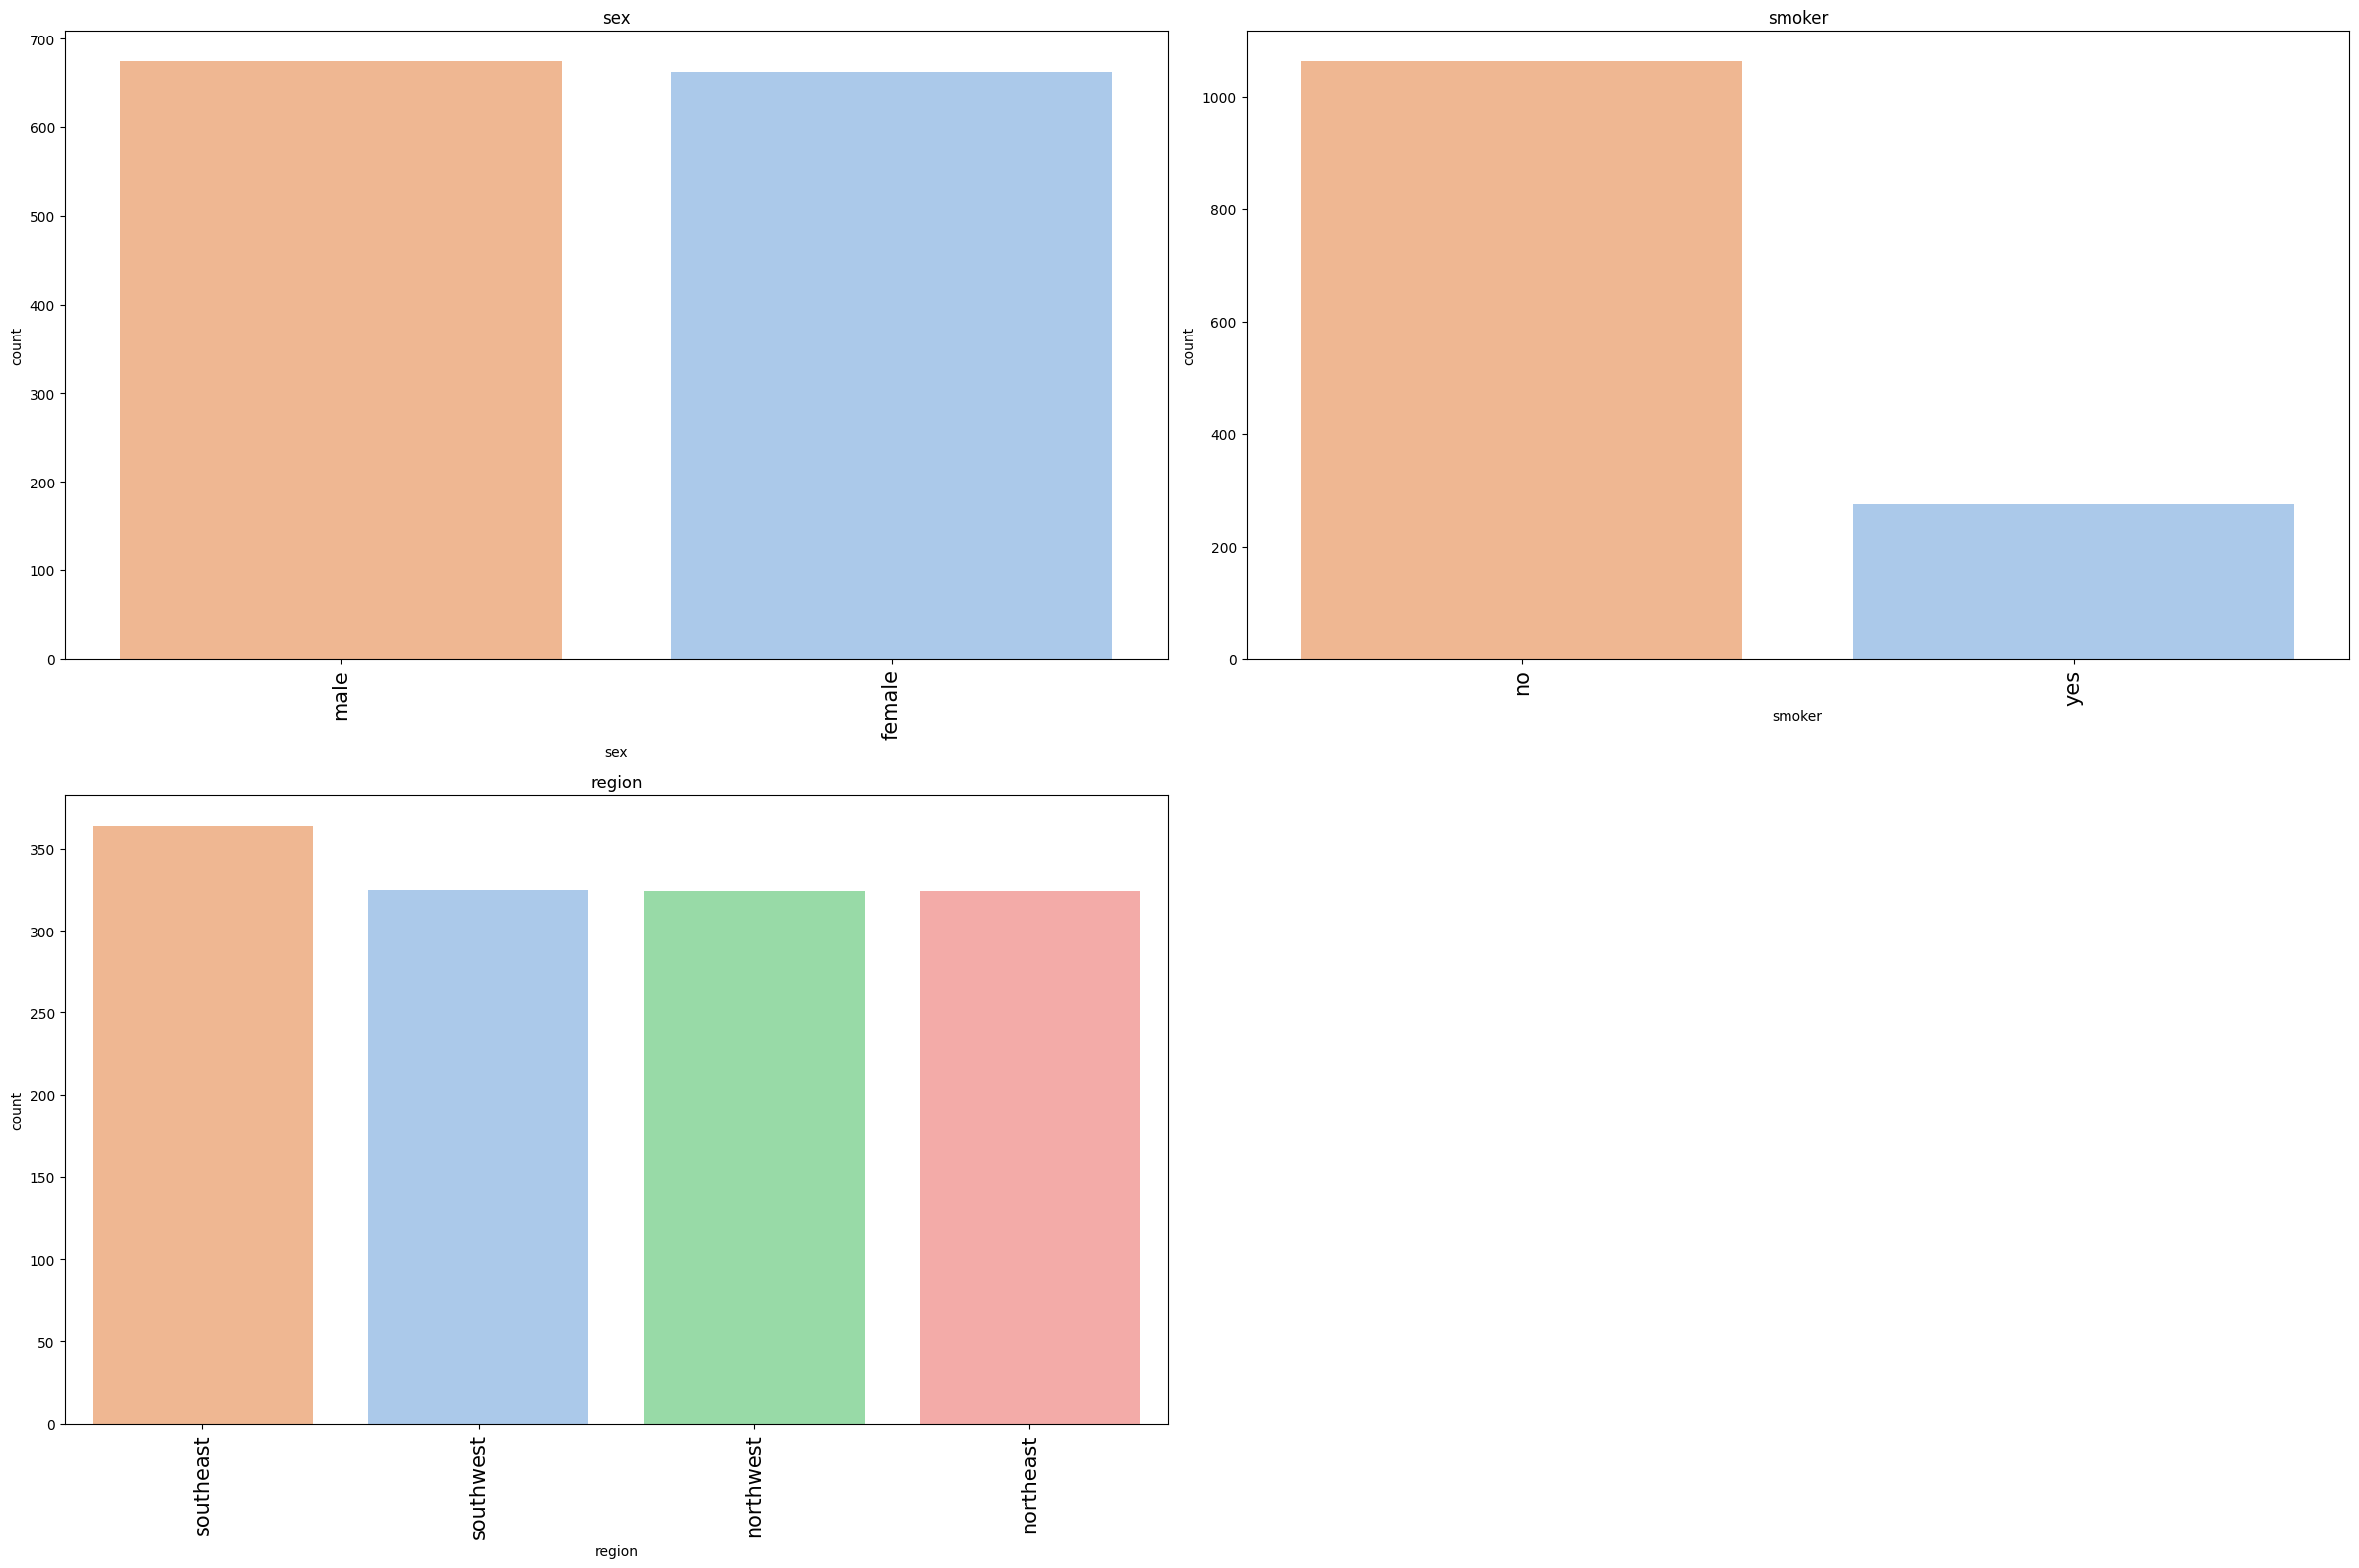

🔢 NUMERIC VARIABLES


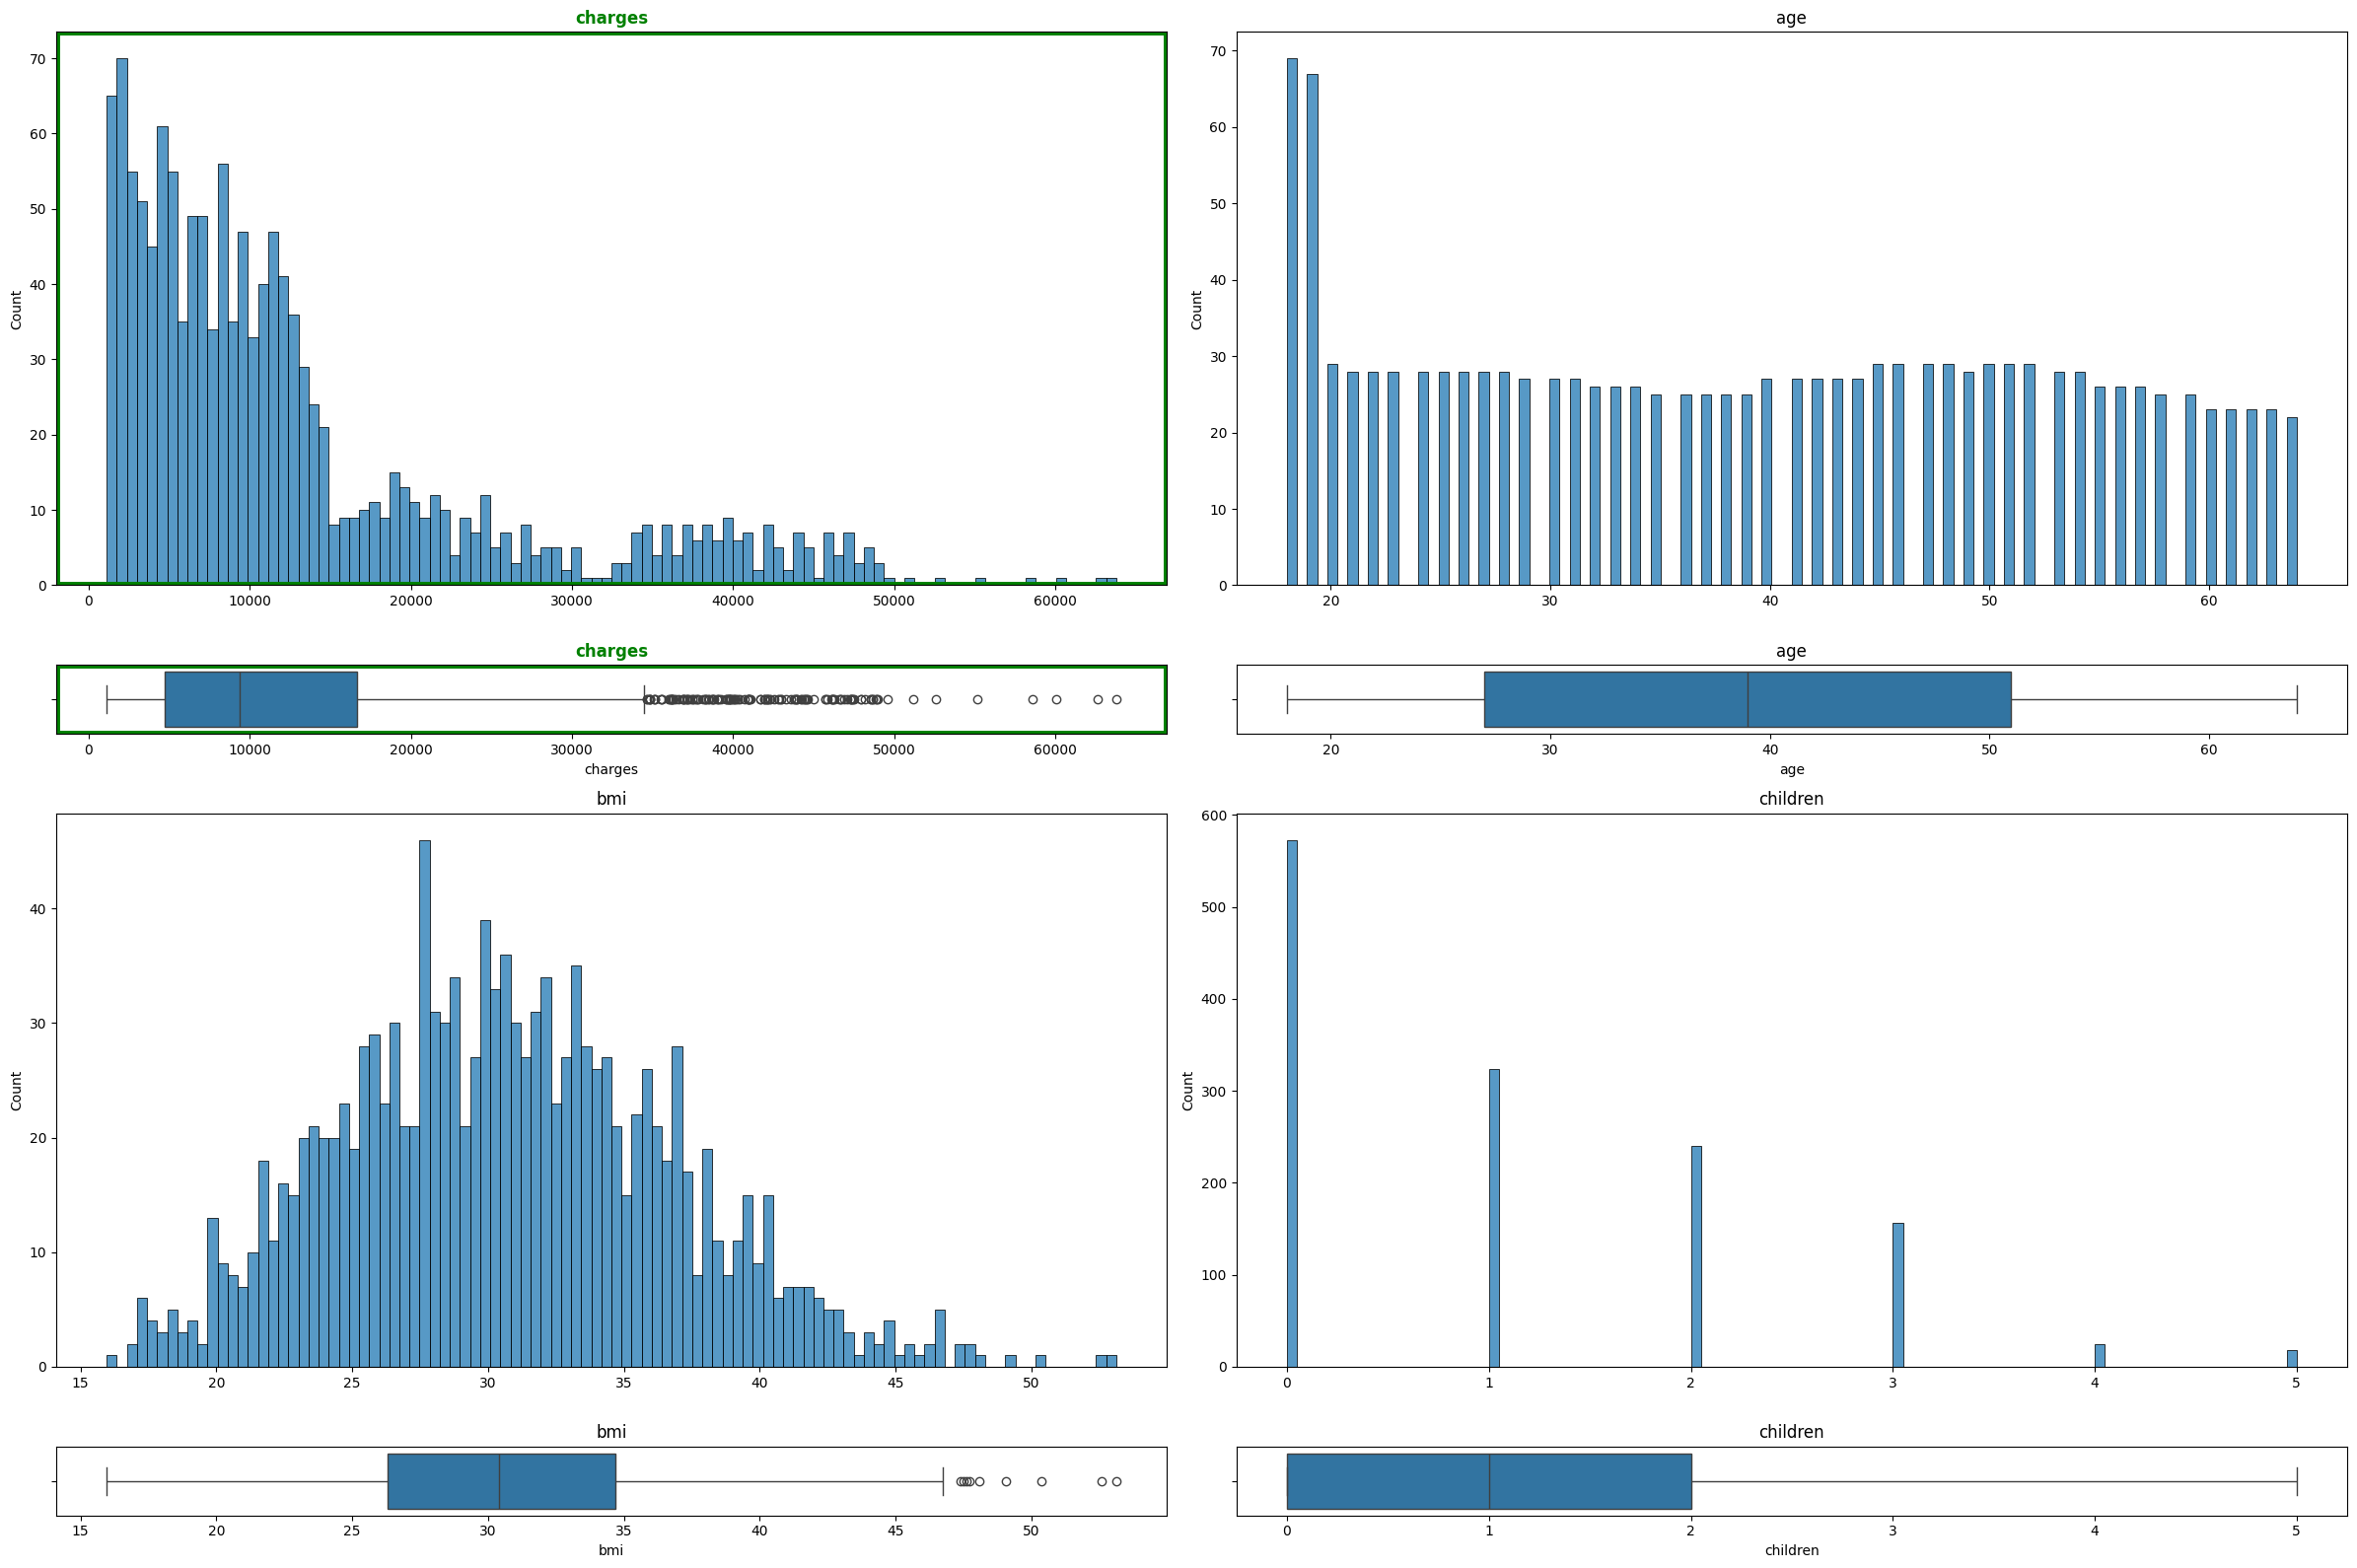

In [28]:
# -------------------------------
# STEP 5 - UNIVARIABLE ANALYSIS
# -------------------------------
print("STEP 5 - UNIVARIABLE ANALYSIS")

if not make_plots:
    print("UNIVARIABLE ANALYSIS is not printed, set make_plots = True")
else:

    # Copy of previous DataFrame
    df_S5 = df_S4.copy()

    # Target highlighting styles
    target_box_style = dict(facecolor='none', edgecolor=y_var_highlighting_color, linewidth=5)
    target_title_style = dict(color=y_var_highlighting_color, fontweight='bold')

    # CATEGORY VARIABLES (including target if categorical)
    print("🏷️ CATEGORY VARIABLES")

    var_to_plot = category_att.copy()
    if y_var_type == "CATEGORIC" and y_var not in var_to_plot:
        var_to_plot.insert(0, y_var)

    num_rows = math.ceil(len(var_to_plot) / num_cols)

    fig, axes = plt.subplots(
        nrows=num_rows,
        ncols=num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
    )

    axes = axes.flatten()
    idx = 0

    for col in var_to_plot:
        unique_count = df_S5[col].nunique()

        if unique_count > num_values_to_plot:
            order = df_S5[col].value_counts().head(num_values_to_plot).index
        else:
            order = df_S5[col].value_counts().index

        sns.countplot(
            ax=axes[idx],
            data=df_S5,
            x=col,
            hue=col,
            palette=my_palette,
            order=order,
            legend=False
        )
        axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)

        # Highlight target
        if col == y_var:
            axes[idx].set_title(col, **target_title_style)
            axes[idx].add_patch(
                plt.Rectangle((0, 0), 1, 1, transform=axes[idx].transAxes, **target_box_style)
            )
        else:
            axes[idx].set_title(col)

        # Add truncated info
        if unique_count > num_values_to_plot:
            msg = f"There are {unique_count} values,\nbut only {num_values_to_plot} have been plotted"
            axes[idx].text(
                0.5, 0.9, msg,
                transform=axes[idx].transAxes,
                fontsize=my_font_size,
                color="red",
                ha="center", va="top",
                bbox=dict(facecolor="grey", alpha=0.25, edgecolor="red")
            )

        idx += 1

    # Hide unused axes
    for j in range(idx, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    # NUMERIC VARIABLES (including target if numeric)
    print("🔢 NUMERIC VARIABLES")

    var_to_plot = numeric_att.copy()
    if y_var_type == "NUMERIC" and y_var not in var_to_plot:
        var_to_plot.insert(0, y_var)

    num_rows = math.ceil(len(var_to_plot) / num_cols)

    fig, axes = plt.subplots(
        nrows=num_rows * 2,
        ncols=num_cols,
        figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
    )

    var_idx = 0
    for row in range(num_rows):
        for col in range(num_cols):

            if var_idx >= len(var_to_plot):
                axes[row * 2, col].set_visible(False)
                axes[row * 2 + 1, col].set_visible(False)
                continue

            colname = var_to_plot[var_idx]

            # Histogram
            sns.histplot(
                ax=axes[row * 2, col],
                data=df_S5,
                x=colname,
                bins=num_bins
            )
            axes[row * 2, col].set_xlabel("")

            # Boxplot
            sns.boxplot(
                ax=axes[row * 2 + 1, col],
                data=df_S5,
                x=colname
            )

            # Highlight target
            if colname == y_var:
                axes[row * 2, col].set_title(colname, **target_title_style)
                axes[row * 2 + 1, col].set_title(colname, **target_title_style)

                axes[row * 2, col].add_patch(
                    plt.Rectangle((0, 0), 1, 1, transform=axes[row * 2, col].transAxes, **target_box_style)
                )
                axes[row * 2 + 1, col].add_patch(
                    plt.Rectangle((0, 0), 1, 1, transform=axes[row * 2 + 1, col].transAxes, **target_box_style)
                )
            else:
                axes[row * 2, col].set_title(colname)
                axes[row * 2 + 1, col].set_title(colname)

            var_idx += 1

    plt.tight_layout()
    plt.show()


CONCLUSIONS:
- data is well divided between male and female
- most of the data are non-smokers
- data is well divided among the 4 different regions
- bmi shows some outliers

STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET

 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target


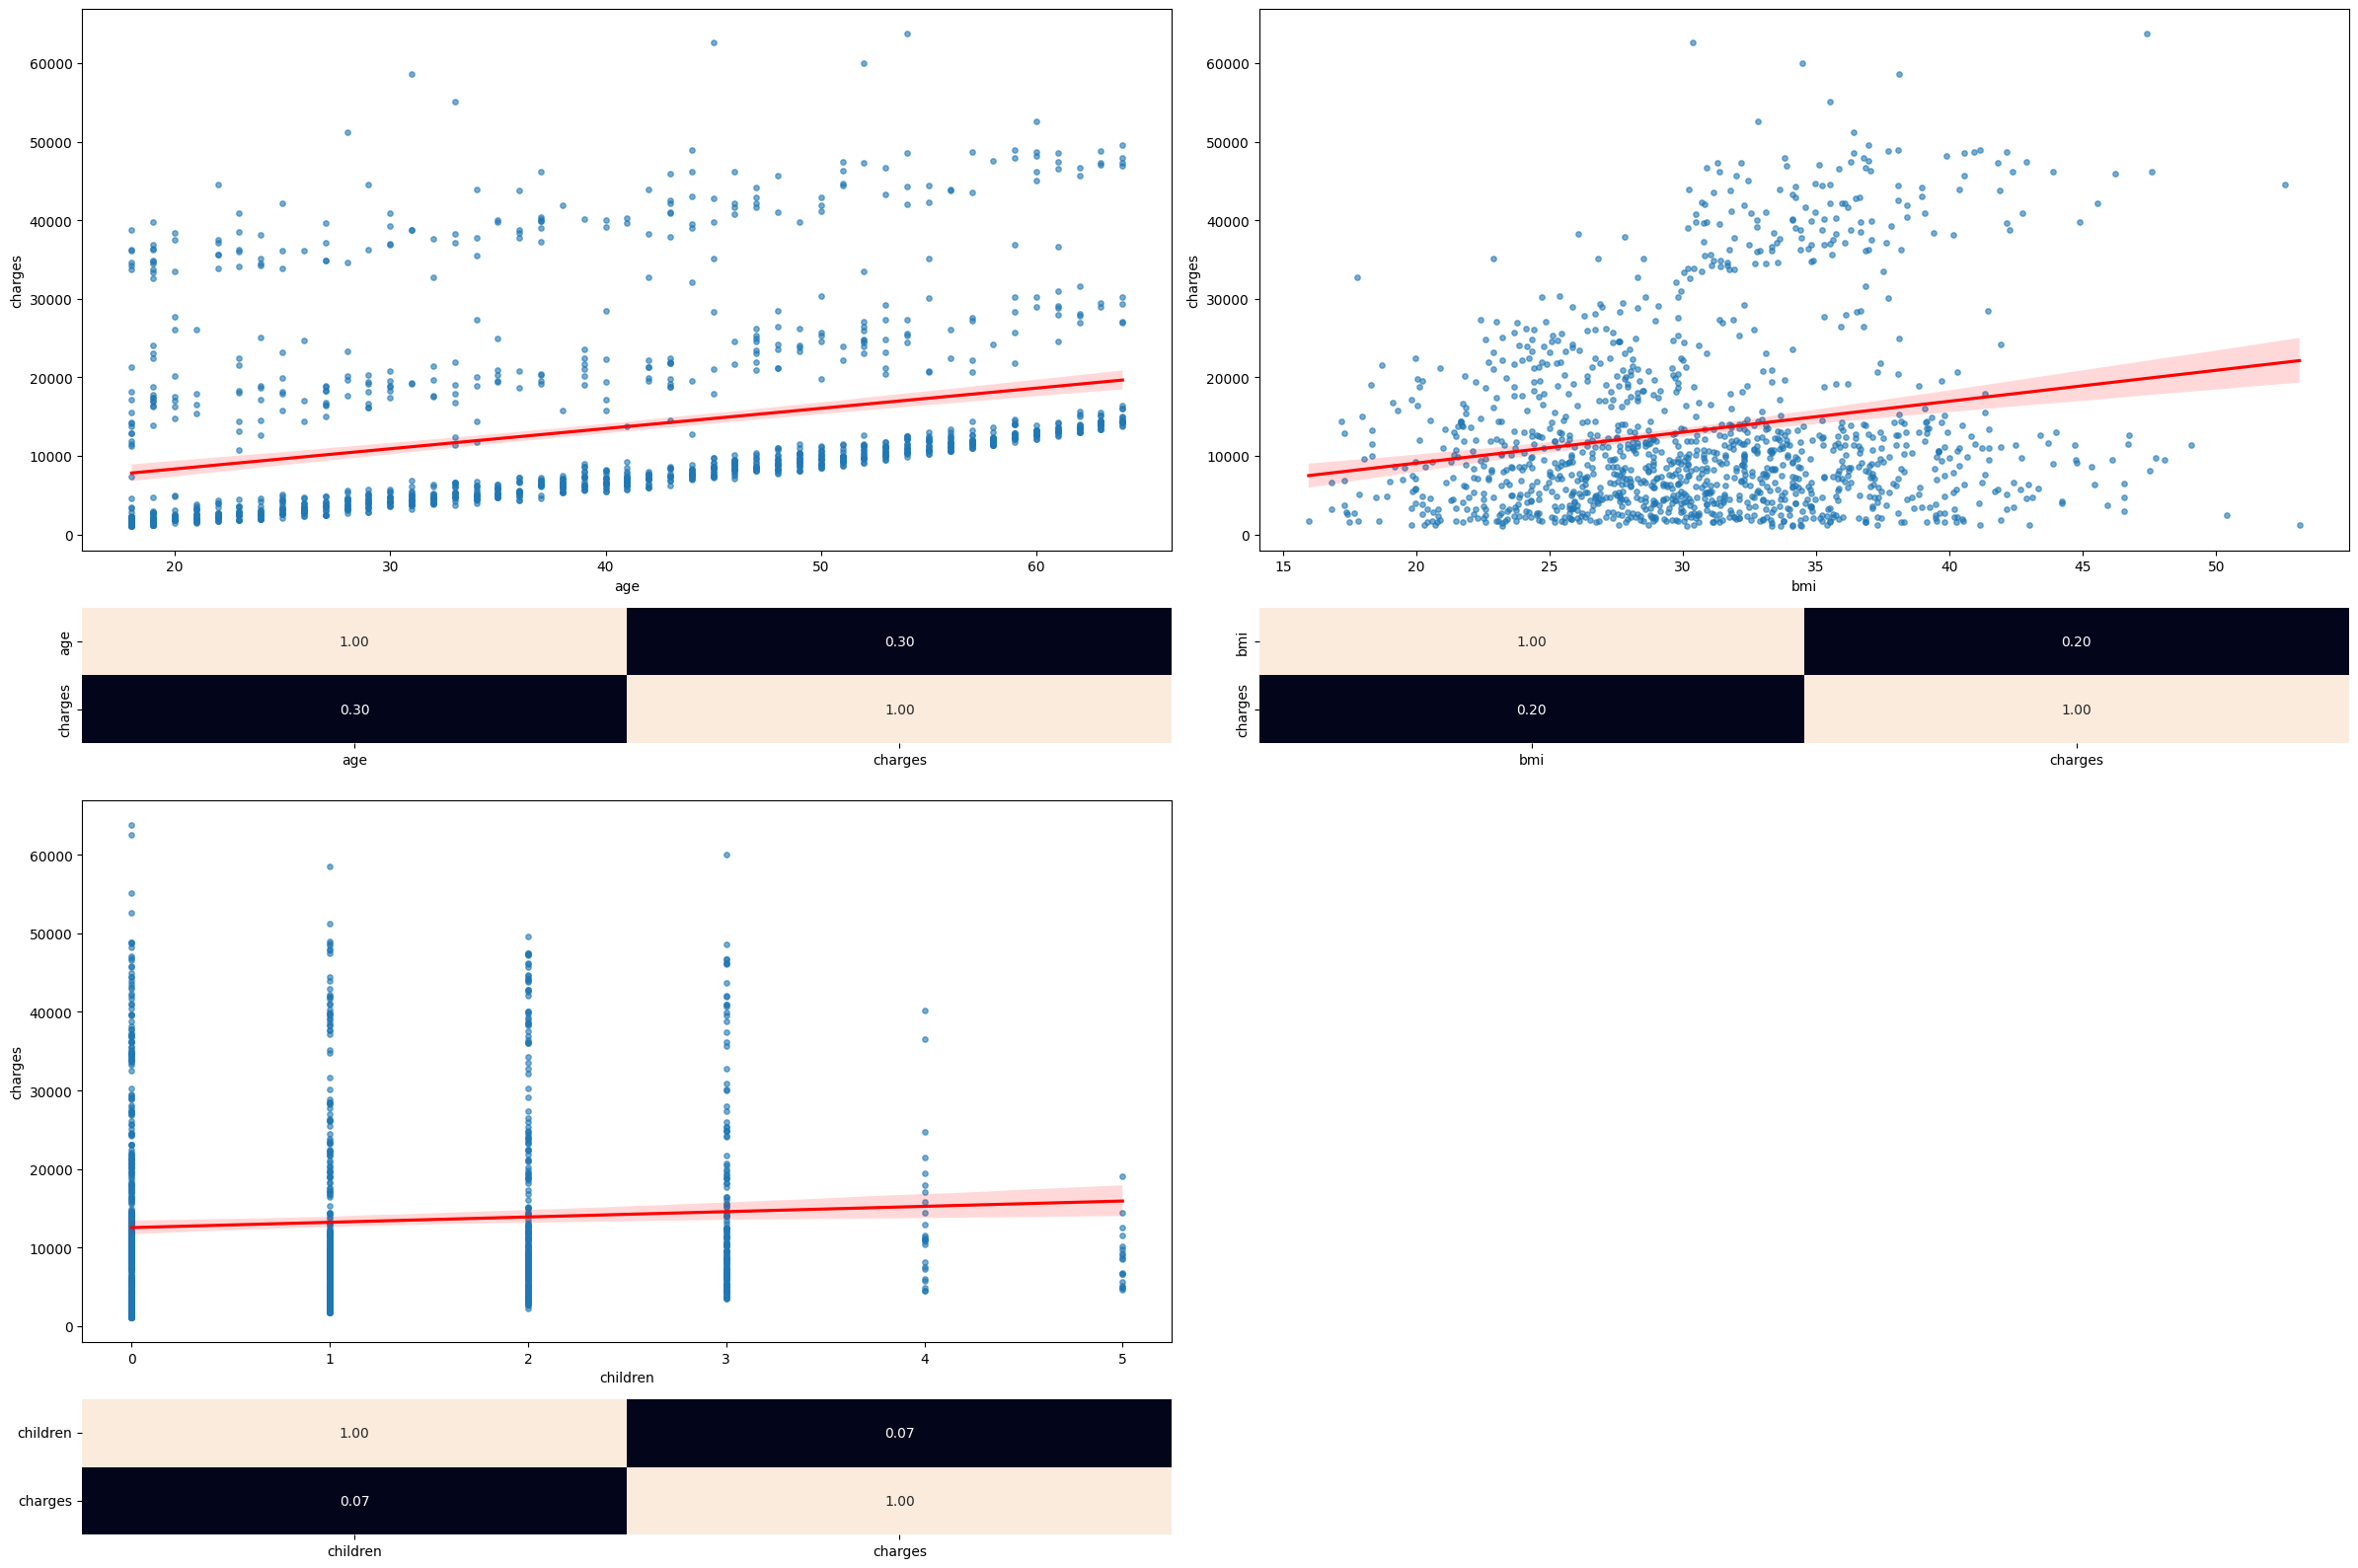


 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target


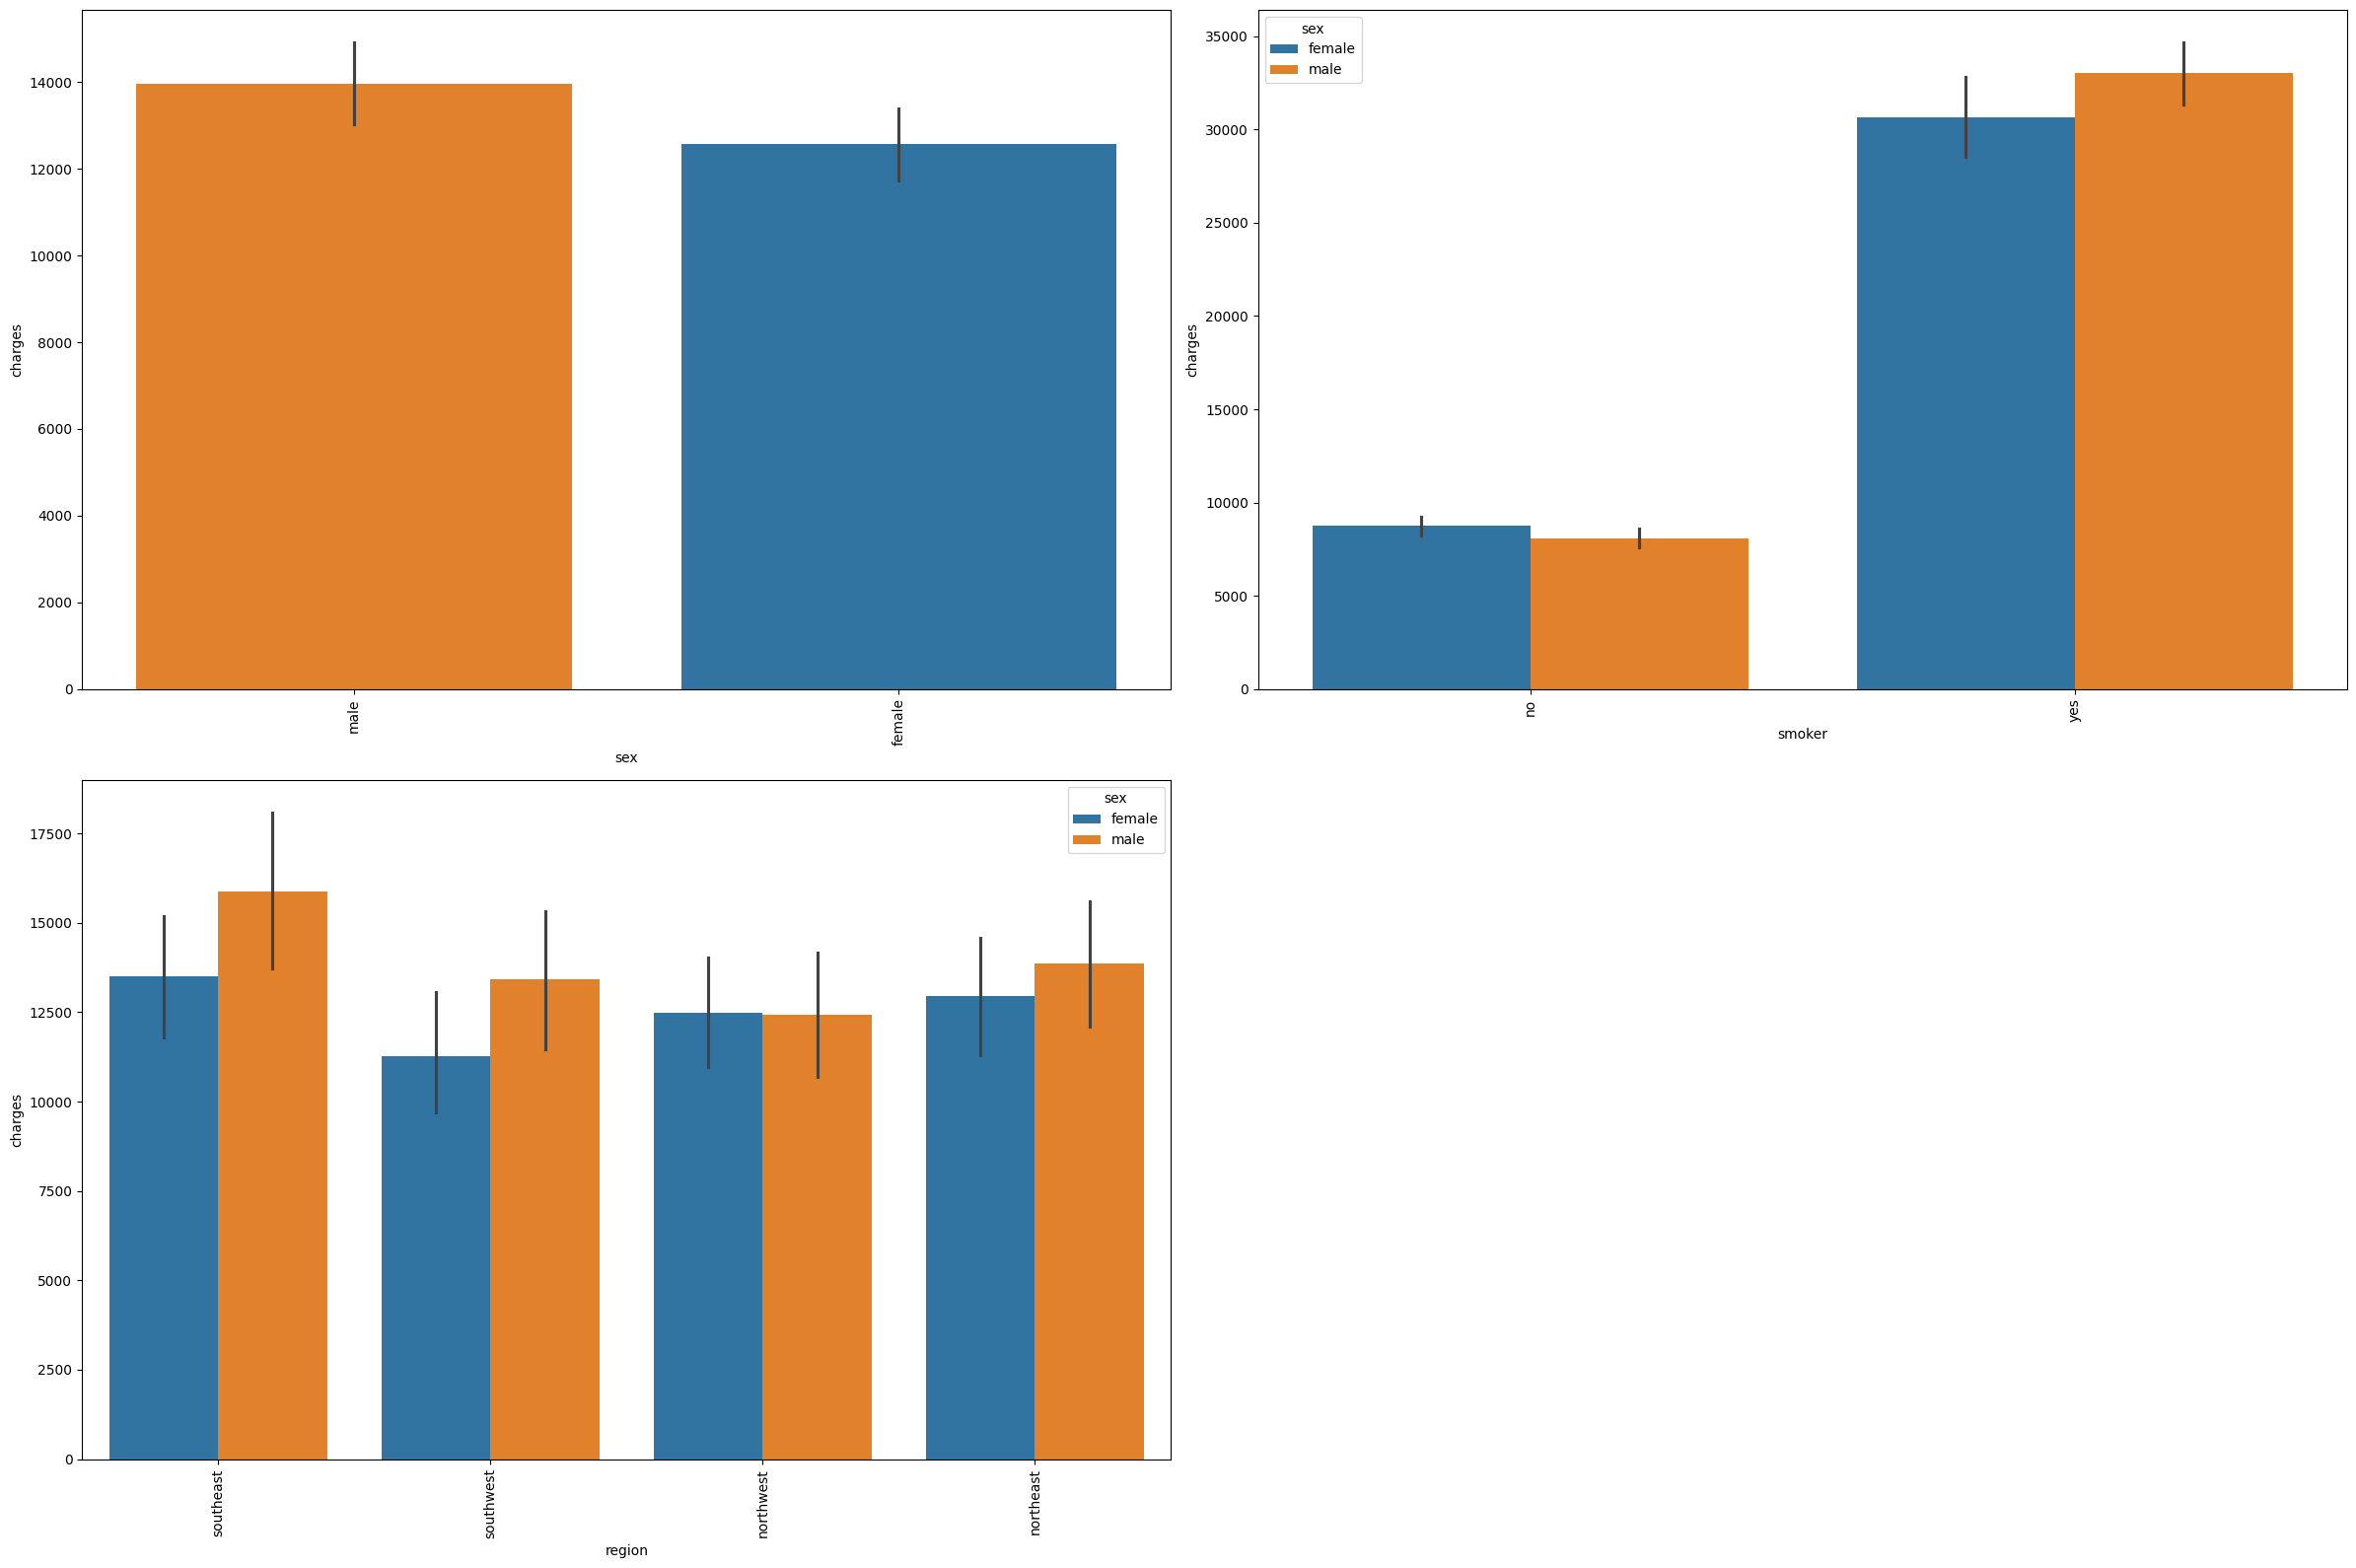


 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target
   This type of plot is non applicable for this case, because the target variable is NUMERIC


In [32]:
# -------------------------------
# STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET
# -------------------------------
print("STEP 6 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET")

if not make_plots:
    print("MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET is not printed, set make_plots = True")
else:
    # Copy  of previous DataFrame
    df_S6 = df_S4.copy()

    print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target")

    if y_var_type == "CATEGORIC":
        print("   This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:
        # Set plotting variables
        var_to_plot=numeric_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots with custom height ratios
        fig, axes = plt.subplots(
            nrows = num_rows * 2,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
            gridspec_kw={'height_ratios': [4, 1] * num_rows})

        # Loop through variables
        var_idx = 0
        for row in range(num_rows):
            for col in range(num_cols):
                if var_idx >= len(var_to_plot):
                    # Hide unused subplots
                    axes[row * 2, col].set_visible(False)
                    axes[row * 2 + 1, col].set_visible(False)
                    continue

                # Regplot (top)
                sns.regplot(
                    ax = axes[row * 2, col],
                    data = df_S6,
                    x = var_to_plot[var_idx],
                    y = y_var,
                    scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                    line_kws = {'color': 'red'})

                # Boxplot (bottom)
                sns.heatmap(
                    ax = axes[row * 2 + 1, col],
                    data = df_S6[[var_to_plot[var_idx], y_var]].corr(),
                    annot = True,
                    fmt = ".2f",
                    cbar = False)

                var_idx += 1

        # Adjust layout
        plt.tight_layout()
        plt.show()
    
    print("\n 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target")

    if y_var_type == "CATEGORIC":
        print("   This type of plot is non applicable for this case, because the target variable is CATEGORIC")
    else:        
        # Set plotting variables
        var_to_plot=category_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows))

        # flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:

            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create barplot
            sns.barplot(
                ax=axes[idx],
                data = df_S6,
                x = col,
                y = y_var,
                hue = category_combi_att,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=10)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize = my_font_size,
                    color = 'red',
                    ha = 'center',
                    va = 'top',
                    bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

    print("\n 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target")

    if y_var_type == "NUMERIC":
        print("   This type of plot is non applicable for this case, because the target variable is NUMERIC")
    else:
        # Set plotting variables
        hue_order = sorted(df_S6[y_var].dropna().unique().tolist()) # Determine hue order dynamically
        var_to_plot=category_att # Variable type for this plot
        num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

        # Create subplots
        fig, axes = plt.subplots(
            nrows = num_rows,
            ncols = num_cols,
            figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
            
        # Flatten the axes array for easier access
        axes = axes.flatten()  

        # Loop through variables
        idx = 0
        for col in var_to_plot:
            # Count unique values
            unique_count = df_S6[col].nunique()
            
            # Limit the number of plotted categories if there are more than num_values_to_plot
            if unique_count > num_values_to_plot:
                order = df_S6[col].value_counts().head(num_values_to_plot).index
            else:
                order = df_S6[col].value_counts().index
            
            # Create countplot
            sns.countplot(
                ax = axes[idx],
                data = df_S6,
                x = col,
                hue = y_var,
                hue_order = hue_order,
                palette = my_palette,
                order = order)
            axes[idx].tick_params(axis='x', rotation=90, labelsize=my_font_size)
            
            # Add text box if truncated
            if unique_count > num_values_to_plot:
                msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                axes[idx].text(
                    x = 0.5,
                    y = 0.9,
                    s = msg,
                    transform=axes[idx].transAxes,
                    fontsize=my_font_size,
                    color='red',
                    ha='center',
                    va='top',
                    bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
            
            idx += 1

        # Turn off unused axes if there are any
        for j in range(idx, len(axes)):
            axes[j].set_visible(False)

        # Adjust layout and display
        plt.tight_layout()
        plt.show()


CONCLUSIONS:
- males have slighly more tendecy to smoke than females
- northwest is the only region with more females than males

STEP 7 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES

 🔢 NUMERIC Attributes VS 🔢 NUMERIC Attributes


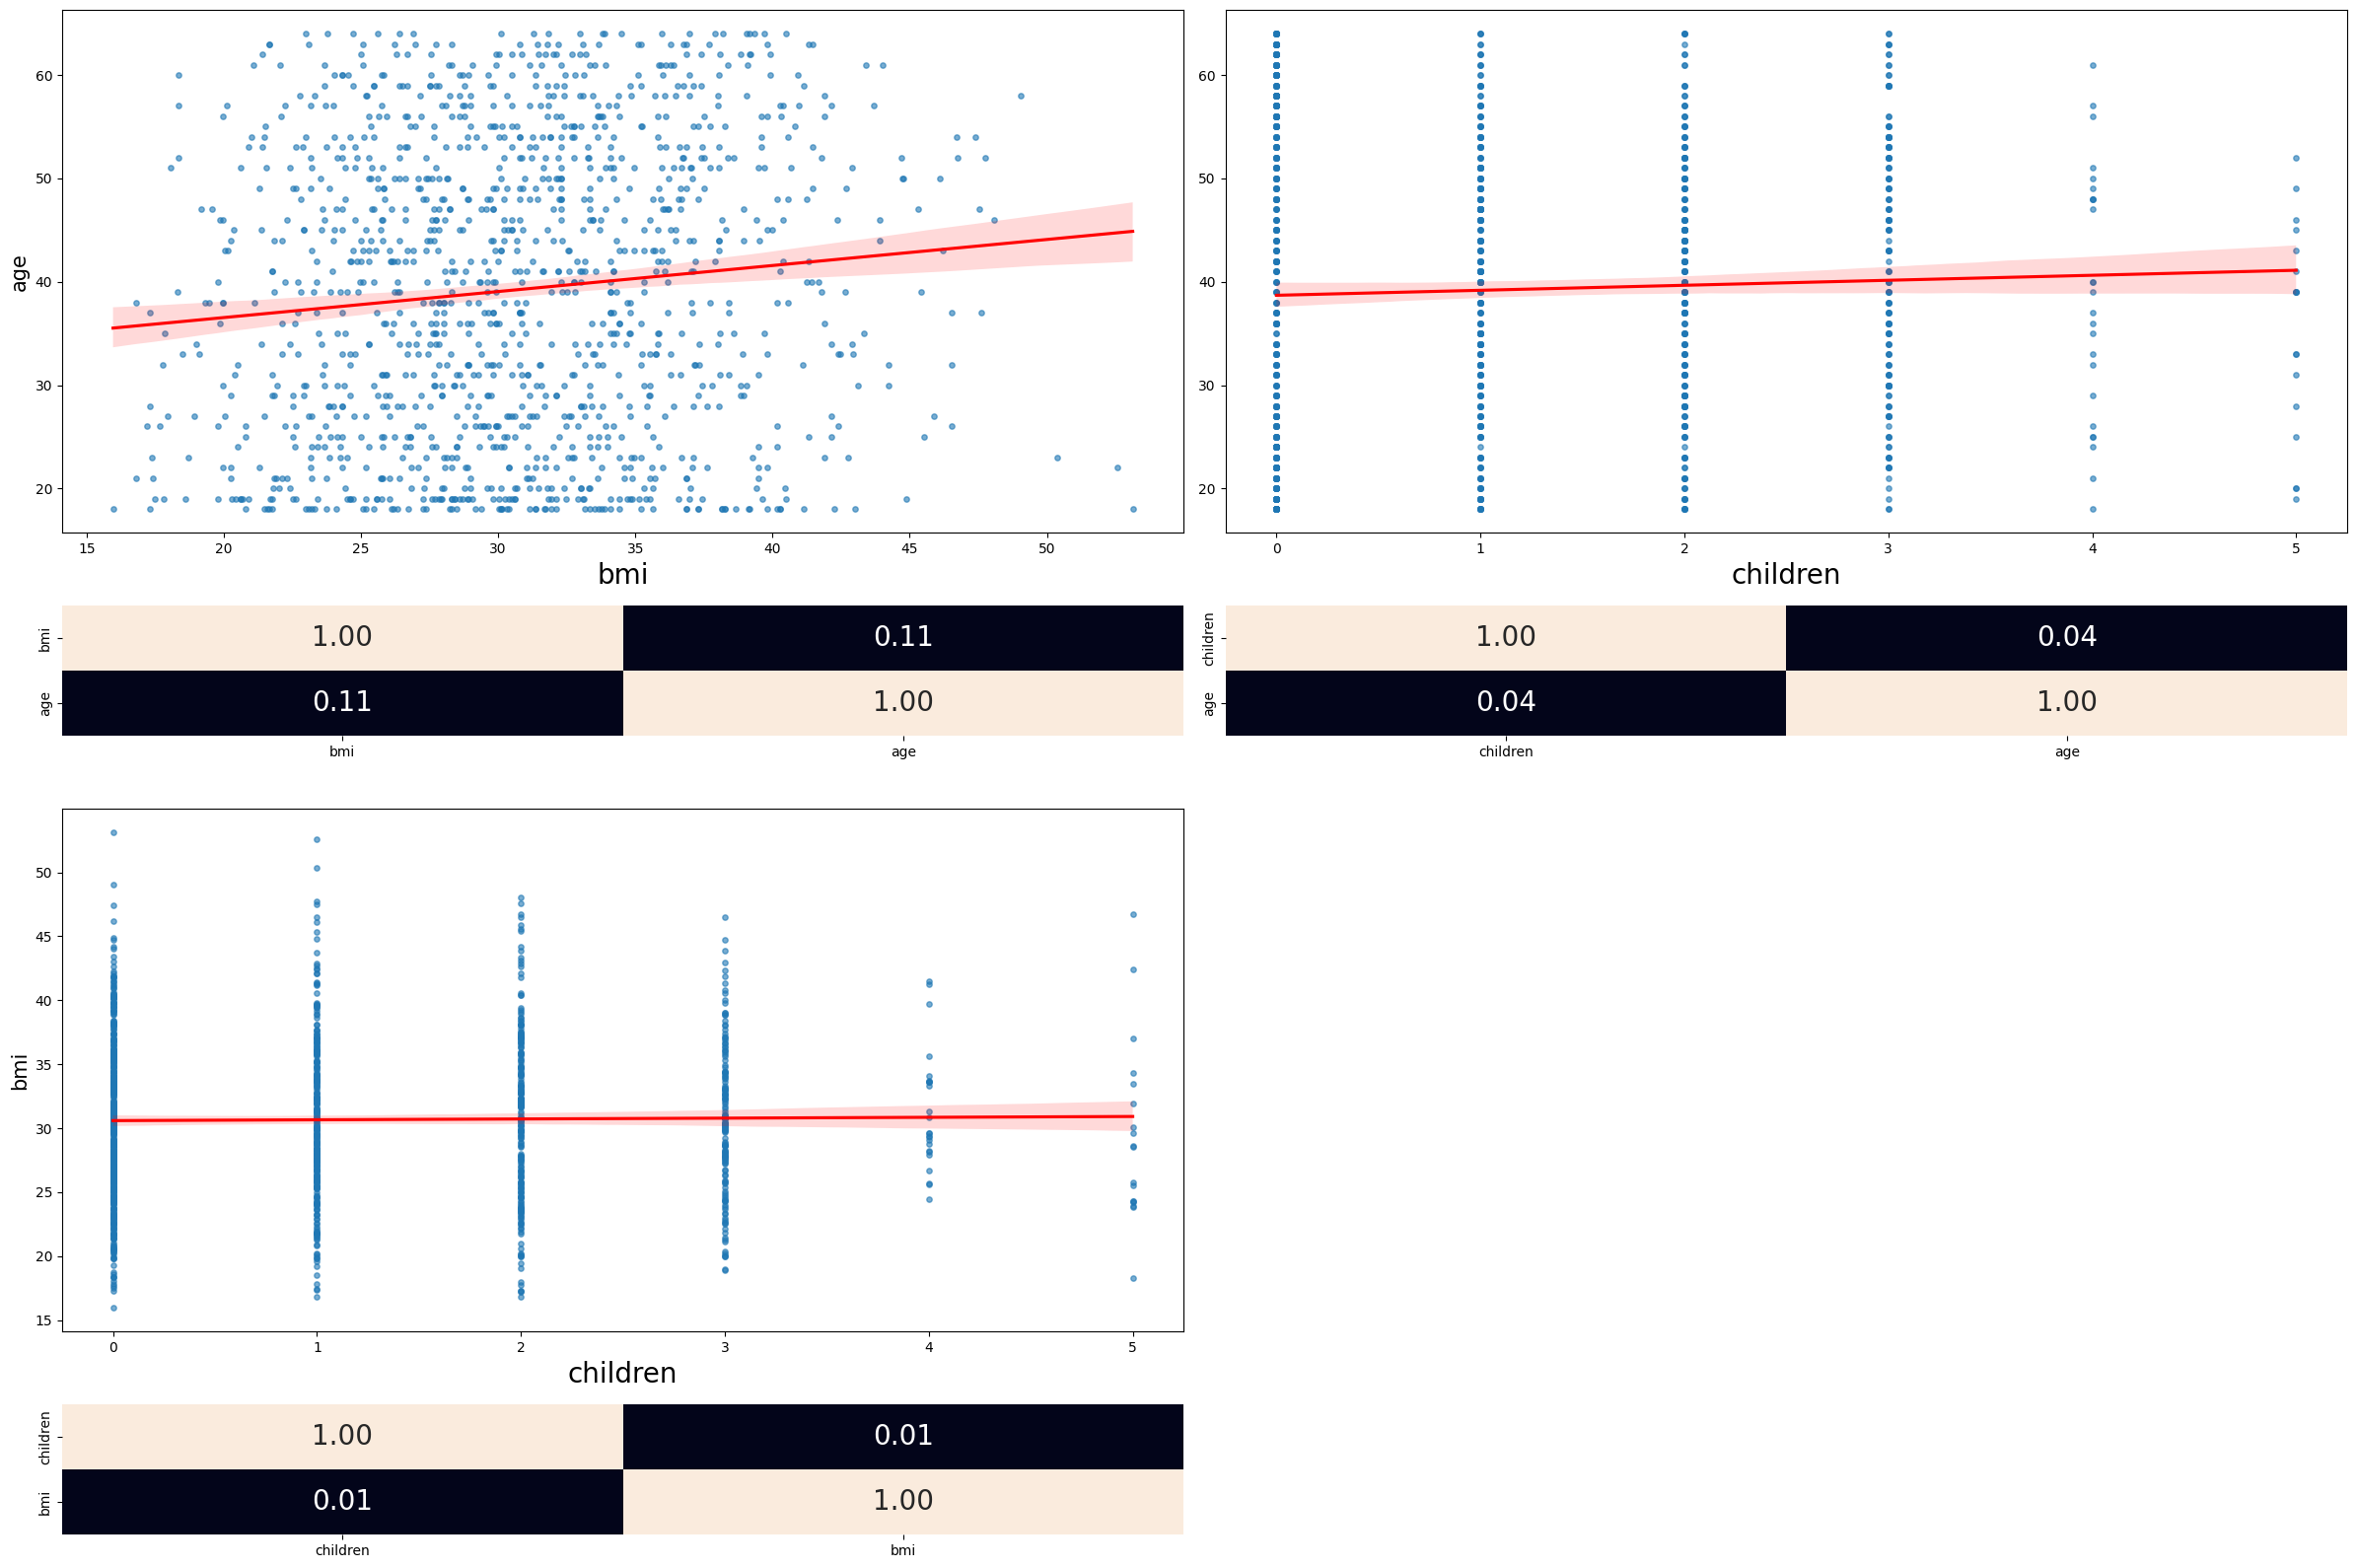


 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes


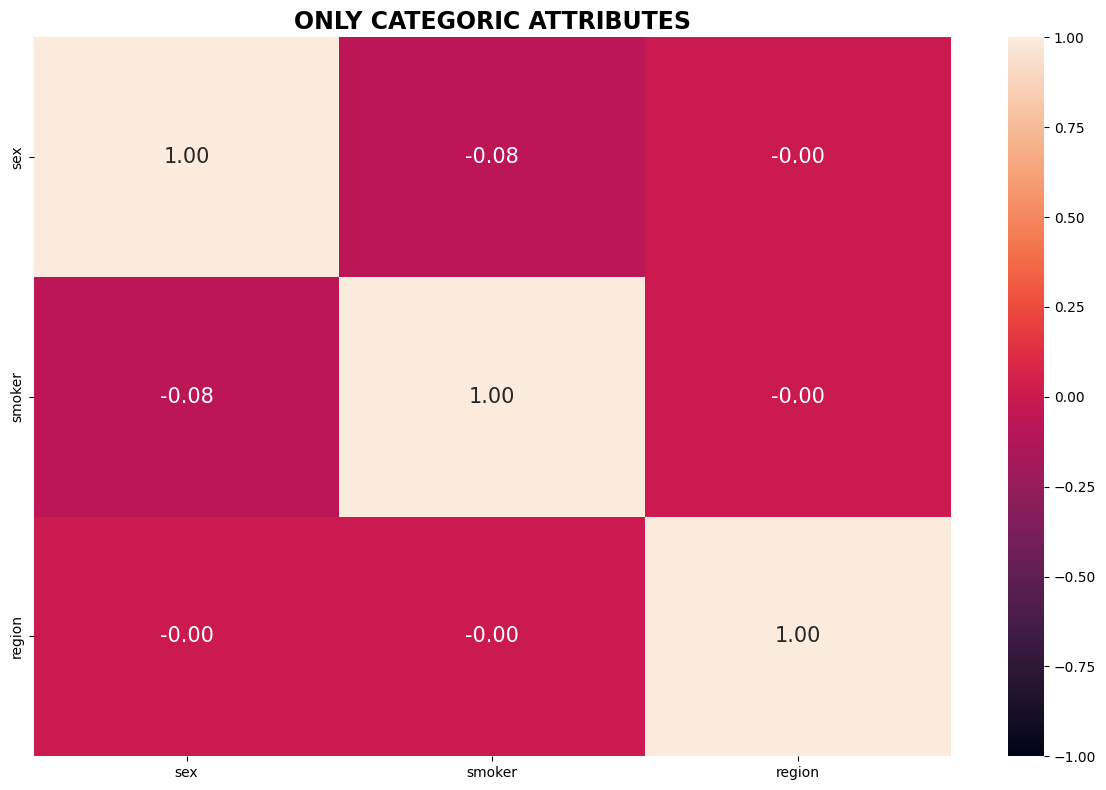

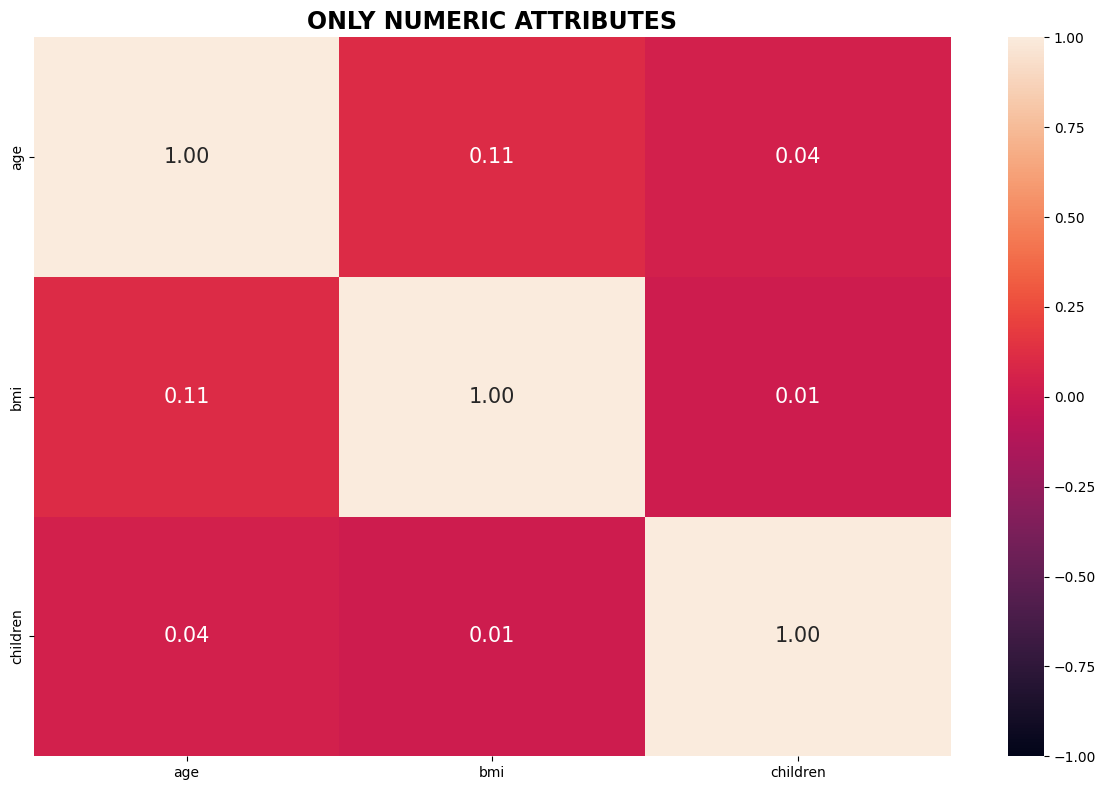

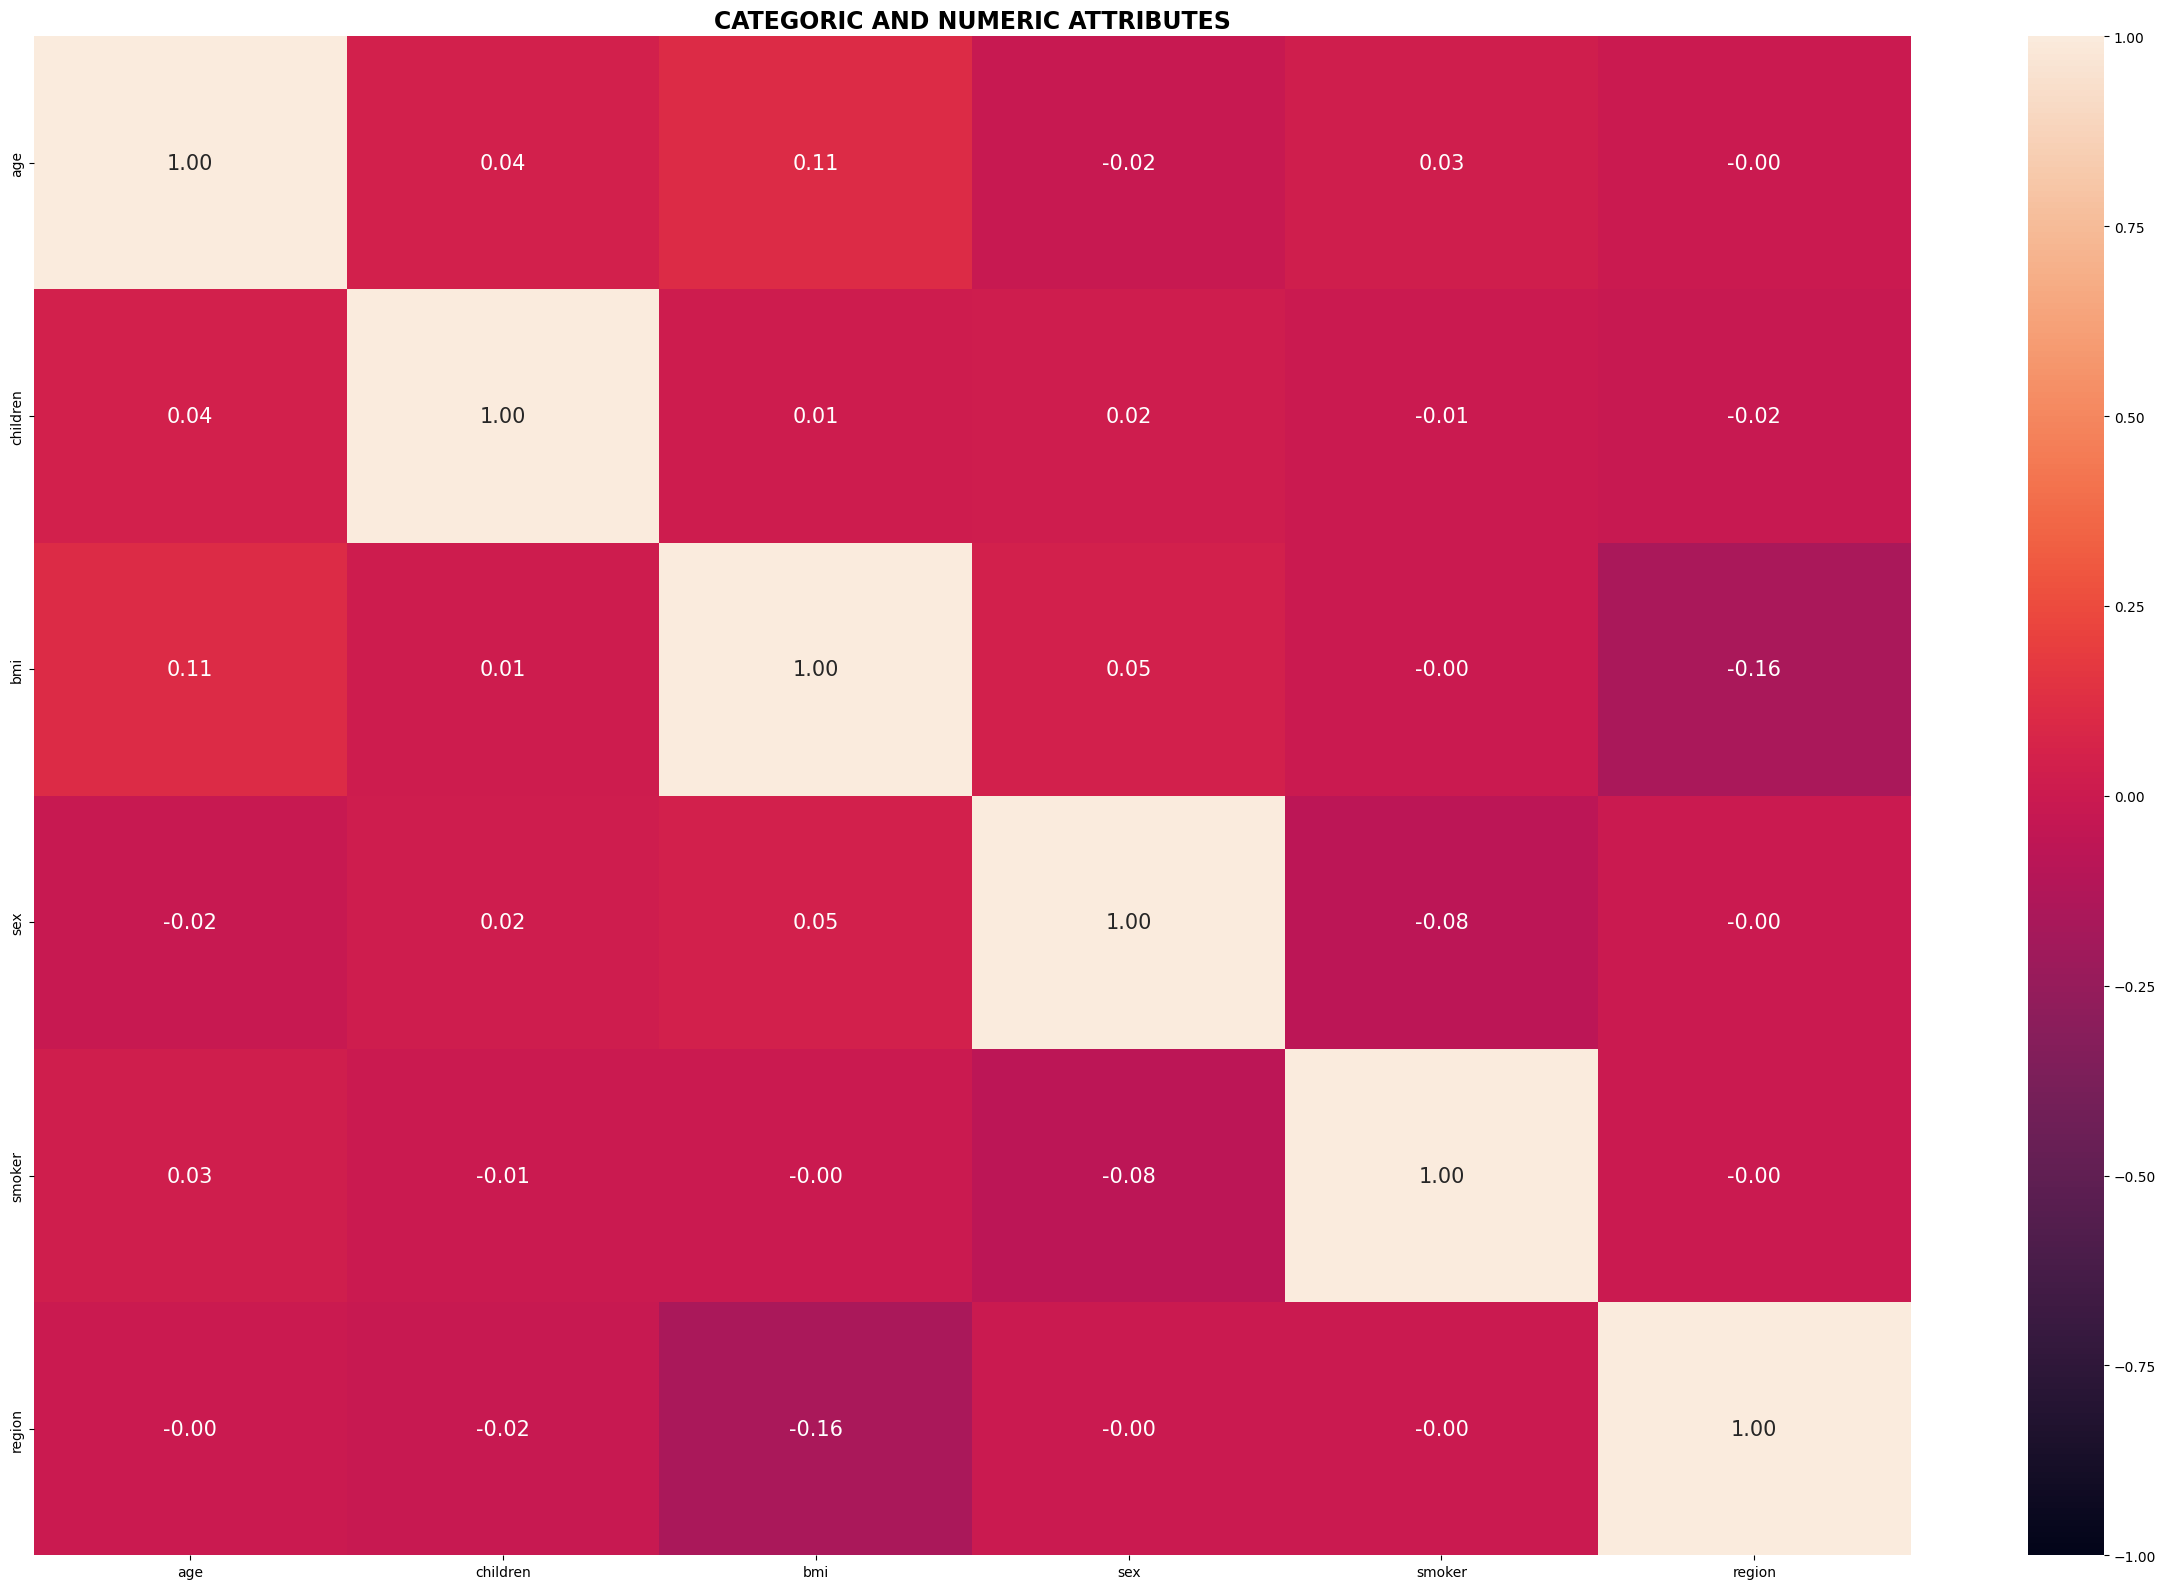

<Figure size 1200x800 with 0 Axes>

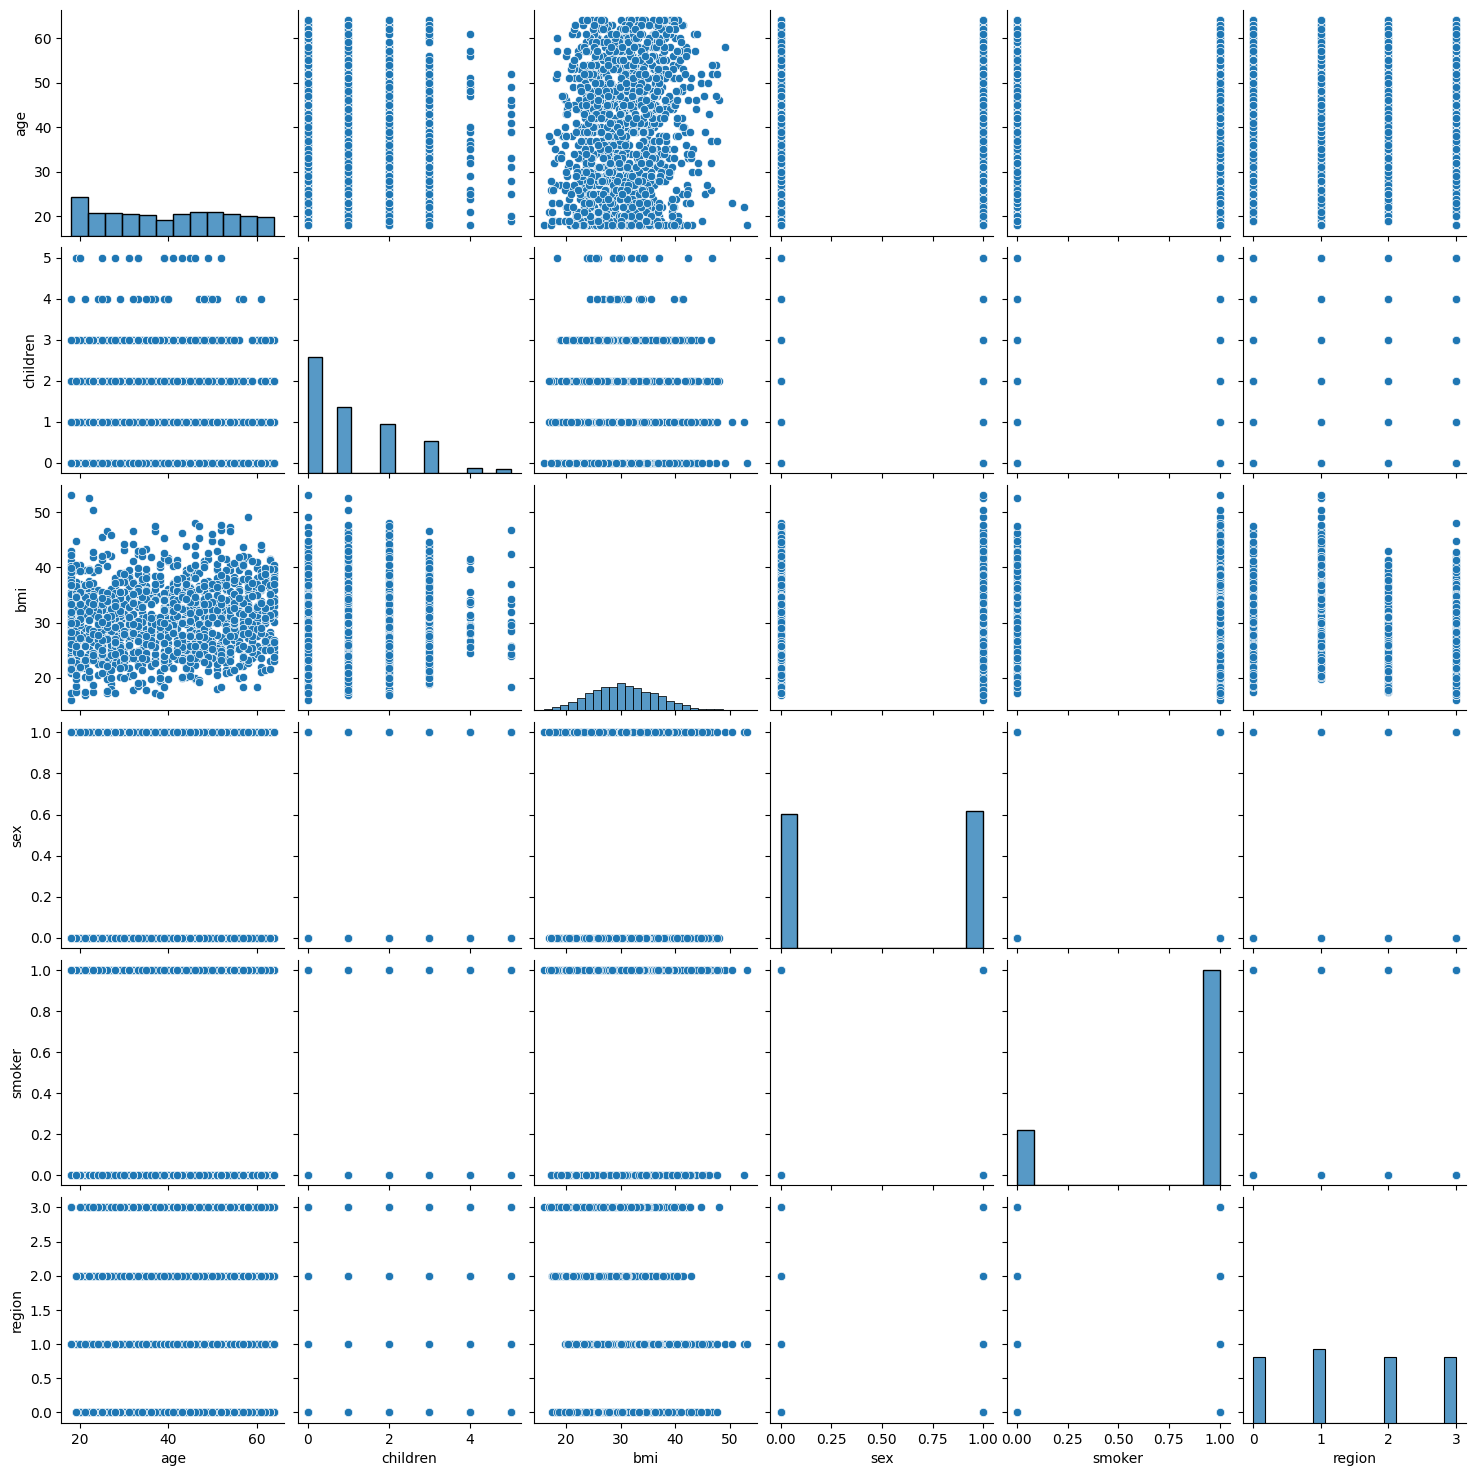

In [35]:
# -------------------------------
# STEP 7 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES
# -------------------------------
print("STEP 7 - MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES")

if not make_plots:
    print("MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES is not printed, set make_plots = True")
else:
    # Copy of previous DataFrame
    df_S7 = df_S4.copy()

    print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Attributes")

    var_to_plot = numeric_att
    num_rows = len(var_to_plot) - 1  # Number of rows (one less than number of variables)

    # Create subplots with two stacked plots (regplot + heatmap) per variable pair
    fig, axes = plt.subplots(
        nrows = num_rows * 2,
        ncols = len(var_to_plot) - 1,
        figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
        gridspec_kw={'height_ratios': [4, 1] * num_rows})

    # Flatten axes for easy handling
    axes = np.array(axes)

    # Track subplot usage
    for row in range(num_rows):
        n_cols = len(var_to_plot) - row - 1  # Decreasing number of columns each row
        for col in range(n_cols):

            # Top: regplot
            sns.regplot(
                ax = axes[row * 2, col],
                data = df_S7,
                x = var_to_plot[row + col + 1],
                y = var_to_plot[row],
                scatter_kws = {'s': my_font_size, 'alpha': 0.6},
                line_kws = {'color': 'red'})
            axes[row * 2, col].set_xlabel(var_to_plot[row + col + 1], fontsize=20)

            # Show Y label only for first plot in row
            if col == 0:
                axes[row * 2, col].set_ylabel(var_to_plot[row], fontsize=my_font_size)
            else:
                axes[row * 2, col].set_ylabel("")

            # Bottom: heatmap (correlation)
            sns.heatmap(
                ax = axes[row * 2 + 1, col],
                data = df_S7[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
                annot = True,
                fmt = ".2f",
                cbar = False,
                annot_kws = {"size": 20})

        # Hide unused subplots on the right for this row
        for col in range(n_cols, len(var_to_plot) - 1):
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)

    # Adjust layout and show
    plt.tight_layout()
    plt.show()

    print("\n 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes")

    # Encode categorical variables using the Series.factorize() method
    for col in category_att:
        codes, uniques = df_S7[col].factorize()
        df_S7[col] = codes  # replace column with integer codes

    # CATEGORIC ATTRIBUTES HEATMAP
    if len(category_att) > 1:
        corr_cat = df_S7[category_att].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY CATEGORIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_cat,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough categorical attributes for a correlation matrix.")

    # NUMERIC ATTRIBUTES HEATMAP
    if len(numeric_att) > 1:
        corr_num = df_S7[numeric_att].corr()
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        plt.title("ONLY NUMERIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
        sns.heatmap(
            data=corr_num,
            annot=True,
            vmin=-1,
            vmax=1,
            fmt=".2f",
            annot_kws={"size": my_font_size}
        )
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Not enough numeric attributes for a correlation matrix.")

    # ALL VARIABLES HEATMAP
    corr_matrix = df_S7[numeric_att + category_att].corr()
    corr_order = corr_matrix.mean().sort_values(ascending=False).index
    corr_matrix = corr_matrix.loc[corr_order, corr_order]

    fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
    plt.title("CATEGORIC AND NUMERIC ATTRIBUTES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_matrix,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()

    # PAIRPLOT (sorted by correlation order)
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    sns.pairplot(data=df_S7[corr_order])
    plt.show()


CONCLUSIONS:
- attributes do not keep a hight correlation between them -> no noise

In [40]:
# -------------------------------
# STEP 8) REMOVE NOISY ATTRIBUTES
# -------------------------------
print("STEP 8) REMOVE NOISY ATTRIBUTES")

# Copy of previous DataFrame
df_S8 = df_S4.copy()

# Correlation level considered as "too high"
corr_threshold = 0.9  

#  NUMERIC ATTRIBUTES (Pearson correlation)
corr_matrix = df_S8[numeric_att].corr().abs()
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            if col_i not in to_drop:
                to_drop.add(col_i)

if to_drop:
    df_S8 = df_S8.drop(columns=list(to_drop), axis=1)
    print(f"- ⚠️ High NUMERIC attributes correlation detected (Pearson Corr. > {corr_threshold}). Dropped:")
    for col in to_drop:
        print(f"   • {col}")
else:
    print(f"- ✅ No NUMERIC attributes exceeded {corr_threshold} Pearson Correlation")

#  CATEGORICAL ATTRIBUTES (Cramér's V)
def cramers_v(x, y): 
    # Step 1: confusion matrix
    confusion_matrix = pd.crosstab(x, y)
    # Step 2: chi-square statistic
    chi2 = chi2_contingency(confusion_matrix)[0]
    # Step 3: phi-squared
    total_samples = confusion_matrix.sum().sum()
    phi2 = chi2 / total_samples
    # Shape of confusion matrix
    r, k = confusion_matrix.shape
    num_rows = confusion_matrix.shape[0]
    num_cols = confusion_matrix.shape[1]
    # Step 4: bias correction (recommended formula)
    correction = ((num_cols - 1) * (num_rows - 1)) / (total_samples - 1)
    phi2_corrected = max(0, phi2 - correction)
    # Corrected dimensions
    rows_corrected = num_rows - ((num_rows - 1) ** 2) / (total_samples - 1)
    cols_corrected = num_cols - ((num_cols - 1) ** 2) / (total_samples - 1)
    # Step 5: compute Cramér's V
    denominator = min(rows_corrected - 1, cols_corrected - 1)
    if denominator <= 0:
        return 0  # avoid division by zero for degenerate tables
    cramers_v_value = np.sqrt(phi2_corrected / denominator)
    return cramers_v_value

to_drop_cat = set()

if len(category_att) > 1:
    for i in range(len(category_att)):
        for j in range(i):
            v = cramers_v(df_S8[category_att[i]], df_S8[category_att[j]])
            if v > corr_threshold:
                col_i = category_att[i]
                col_j = category_att[j]
                if col_i not in to_drop_cat:
                    to_drop_cat.add(col_i)

if to_drop_cat:
    df_S8 = df_S8.drop(columns=list(to_drop_cat), axis=1)
    print(f"- ⚠️ High CATEGORICAL attributes association detected (Cramer’s V > {corr_threshold}). Dropped:")
    for col in to_drop_cat:
        print(f"   • {col}")
else:
    print(f"- ✅ No CATEGORICAL attributes exceeded {corr_threshold} Cramer’s V")

#  Print results
print(f"- ℹ️ Previous df's columns: {len(df_S4.columns)}")
print(f"- ℹ️ Cleaned df's  columns: {len(df_S8.columns)}")
print(f"- ℹ️ Final DataFrame shape: {df_S8.shape}")

display(df_S8.head())

STEP 8) REMOVE NOISY ATTRIBUTES
- ✅ No NUMERIC attributes exceeded 0.9 Pearson Correlation
- ✅ No CATEGORICAL attributes exceeded 0.9 Cramer’s V
- ℹ️ Previous df's columns: 7
- ℹ️ Cleaned df's  columns: 7
- ℹ️ Final DataFrame shape: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# -------------------------------
# STEP 9) CLEAN OUTLIERS
# -------------------------------
print("STEP 9) CLEAN OUTLIERS")

# Copy  of previous DataFrame
df_S9=df_S8.copy()

low_outliers_threshold = 1.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 1.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "NORMAL OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

# Print info
display(df_S9.describe())

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_att:
    if col in df_S9.columns.to_list():
        cols.append(col)

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S9.index)

for col in cols:
    Q1 = df_S9[col].quantile(0.25)
    Q3 = df_S9[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S9[col] < lower).sum()
    n_high = (df_S9[col] > upper).sum()
    n_extreme_low = (df_S9[col] < extreme_lower).sum()
    n_extreme_high = (df_S9[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S9.index)) * 100
    pct_high = (n_high / len(df_S9.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S9.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S9.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_att:
    if col in df_S9.columns.to_list():
        cols.append(col)

if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")
elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low == 0:
            print(f" - ℹ️ None extreme lower outliers detected")
        elif pct_low <= low_outliers_threshold:
            df_S9 = df_S9[df_S9[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high == 0:
            print(f" - ℹ️ None extreme upper outliers detected")
        elif pct_high <= up_outliers_threshold:
            df_S9 = df_S9[df_S9[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")

print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S9)}")
display(df_S9.describe())

STEP 9) CLEAN OUTLIERS


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


,age,bmi,children
lower_limit,-9.0,13.675000,-3.0
upper_limit,87.0,47.315000,5.0
n_outliers_lower,0.0,0.000000,0.0
n_outliers_upper,0.0,9.000000,0.0
pct_outliers_lower,0.0,0.000000,0.0
pct_outliers_upper,0.0,0.673149,0.0


,age,bmi,children
extreme_lower_limit,-45.0,1.06,-6.0
extreme_upper_limit,123.0,59.93,8.0
n_extreme_outliers_lower,0.0,0.00,0.0
n_extreme_outliers_upper,0.0,0.00,0.0
pct_extreme_outliers_lower,0.0,0.00,0.0
pct_extreme_outliers_upper,0.0,0.00,0.0


- ATTRIBUTE age:
 - ℹ️ None lower outliers detected
 - ℹ️ None upper outliers detected


- ATTRIBUTE bmi:
 - ℹ️ None lower outliers detected
 - ⚠️ REMOVED upper outliers (0.67% <= 1.0%)


- ATTRIBUTE children:
 - ℹ️ None lower outliers detected
 - ℹ️ None upper outliers detected


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 1337
 - ℹ️ Cleaned df's  rows: 1328


,age,bmi,children,charges
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.537308,1.097139,13221.047810
std,14.042170,5.922176,1.208008,11997.547468
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4744.325050
50%,39.000000,30.300000,1.000000,9369.615750
75%,51.000000,34.488750,2.000000,16604.302645
max,64.000000,46.750000,5.000000,62592.873090


CONCLUSIONS:
- I goint to stablish a "cut" based on normal upper outliers, it is enough
- The "cut" would be for a maximum of 1 %, higher that than that, normal outliers will not be dropped

In [46]:
# -------------------------------
# STEP 10) MISSING VALUES
# -------------------------------
print("STEP 10) MISSING VALUES")

# Copy of previous DataFrame
df_S10 = df_S9.copy()

# [%] If missing perc > filling_threshold → fill values, otherwise drop rows
filling_threshold = 5.0   

# TARGET VARIABLE
missing_y = df_S10[y_var].isnull().sum()

if missing_y > 0:
    print(f"- ⚠️ Target variable '{y_var}' contains {missing_y} missing values → rows will be dropped.")
    df_S10 = df_S10.dropna(subset=[y_var])
else:
    print(f"- ✅ Target variable '{y_var}' has no missing values.")

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_att:
    if df_S10[col].nunique() < 6:
        group_vars.append(col)

# Calculate missing percentages per column
missing_pct = (df_S10.isnull().sum() / len(df_S10)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all (excluding target variable already handled)")
else:
    # Process each column with missing values
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # CASE 1: NUMERIC ATTRIBUTE → grouped median
        if col in numeric_att:

            if pct > filling_threshold and len(group_vars) > 0:
                print(f" - ⚠️ FILLED missing numeric values in {col} using grouped median by {group_vars}...\n")

                medians = df_S10.groupby(group_vars)[col].median().reset_index()
                medians = medians.rename(columns={col: f"median_{col}"})

                df_S10 = pd.merge(df_S10, medians, on=group_vars, how="left")
                df_S10[col] = df_S10[col].fillna(df_S10[f"median_{col}"])
                df_S10 = df_S10.drop(columns=[f"median_{col}"])

            elif pct <= filling_threshold:
                print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {filling_threshold}%)...\n")
                df_S10 = df_S10.dropna(subset=[col])

            else:
                print(f" - ℹ️ No suitable grouping columns found — skipping fill for {col}.\n")

        # CASE 2: CATEGORICAL ATTRIBUTE → mode imputation
        elif col in category_att:

            print(f" - ⚠️ FILLED missing categorical values in {col} using mode (most frequent value)...\n")
            mode_value = df_S10[col].mode().iloc[0]
            df_S10[col] = df_S10[col].fillna(mode_value)

        # CASE 3: Other types (edge cases)
        else:
            print(f" - ℹ️ Column {col} has unsupported type for imputation — dropping rows.\n")
            df_S10 = df_S10.dropna(subset=[col])


# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S10.isnull().sum()}")


STEP 10) MISSING VALUES
- ✅ Target variable 'charges' has no missing values.
- ✅ DataFrame has no missing values at all (excluding target variable already handled)
- ℹ️ Remaining missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [47]:
# -------------------------------
# STEP 11) SPLIT
# -------------------------------
print("STEP 11) SPLIT")

# Copy  of previous DataFrame
df_SPLIT = df_S10.copy()

my_test_size = 0.2
random_seed = 42

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

STEP 11) SPLIT
- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (1062, 6)
 - X_test: (266, 6)
 - y_train: (1062,)
 - y_test: (266,)

- ℹ️ Content of DataFrames after SPLIT:
 - X_train:
       age     sex    bmi  children smoker     region
414    19  female  35.15         0     no  northwest
171    49    male  30.30         0     no  southwest
947    37    male  34.20         1    yes  northeast
1013   48    male  32.30         1     no  northwest
210    20    male  33.00         1     no  southwest
 - X_test:
       age     sex     bmi  children smoker     region
1210   36    male  30.875         1     no  northwest
115    60    male  28.595         0     no  northeast
986    43    male  30.115         3     no  northwest
176    38    male  27.835         2     no  northwest
63     28  female  25.935         1     no  northwest
 - y_train:
 414      2134.9015
171      8116.6800
947     39047.2850
1013     8765.2490
210      1980.0700
Name: charges, dtype: float64
 - y_test:
 1210     

In [48]:
# -------------------------------
# STEP 12) SCALLING
# -------------------------------
print("STEP 12) SCALLING")

# Copy of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train_es.columns.tolist()

# Instance scaler for each catenumeric attribute
scaler_dic = {
    "age": StandardScaler(),
    "bmi": StandardScaler(),
    "children": StandardScaler()
}
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_att:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]])
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_att:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        new_col_name = columns[i] +"_SS"
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i])

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_att:
        scaled_cols.append(columns[i] + "_SS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

STEP 12) SCALLING
- ✅ All Scalers have been instanced successfully
- ✅ All Scalers have been trained successfully
- ✅ Train and Test data have been scaled for: age
- ✅ Train and Test data have been scaled for: bmi
- ✅ Train and Test data have been scaled for: children


,age_SS,bmi_SS,children_SS
414,-1.426075,0.766010,-0.895408
171,0.705211,-0.051678,-0.895408
947,-0.147304,0.605844,-0.071384
1013,0.634168,0.285513,-0.071384
210,-1.355032,0.403530,-0.071384


In [52]:
# -------------------------------
# STEP 13) ENCODING
# -------------------------------
print("STEP 13) ENCODING")

# Copy of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Dictionary of encoders for each categorical attribute
encoder_dic = {}

# Create encoder instance for each categorical attribute
for col in category_att:

    if col in binary_att:
        encoder_dic[col] = LabelEncoder()
        print(f"- Encoder instanced for {col}: LabelEncoder()")

    elif col in multiclass_att:
        encoder_dic[col] = OneHotEncoder(sparse_output=False)
        print(f"- Encoder instanced for {col}: OneHotEncoder()")

print("- ✅ All Encoders have been instanced successfully")

# Train encoders with TRAIN data only
for col in category_att:

    encoder = encoder_dic[col]

    if isinstance(encoder, LabelEncoder):
        encoder.fit(X_train_en[col])        # LabelEncoder needs 1D

    elif isinstance(encoder, OneHotEncoder):
        encoder.fit(X_train_en[[col]])      # OHE needs 2D

print("- ✅ All Encoders have been trained successfully")

# Apply encoders to TRAIN + TEST
for col in category_att:

    encoder = encoder_dic[col]

    if isinstance(encoder, LabelEncoder):

        X_train_en[col + "_LE"] = encoder.transform(X_train_en[col])
        X_test_en[col + "_LE"] = encoder.transform(X_test_en[col])

        print(f"- ✅ {col} encoded with LabelEncoder()")

    elif isinstance(encoder, OneHotEncoder):

        # Transform train and test
        train_encoded = encoder.transform(X_train_en[[col]])
        test_encoded = encoder.transform(X_test_en[[col]])

        # New names
        ohe_colnames = encoder.get_feature_names_out([col])
        ohe_colnames = [name + "_OHE" for name in ohe_colnames]

        # Convert to DataFrames
        train_ohe_df = pd.DataFrame(train_encoded, index=X_train_en.index, columns=ohe_colnames)
        test_ohe_df = pd.DataFrame(test_encoded, index=X_test_en.index, columns=ohe_colnames)

        # Concatenate new cols
        X_train_en = pd.concat([X_train_en, train_ohe_df], axis=1)
        X_test_en = pd.concat([X_test_en, test_ohe_df], axis=1)

        print(f"- ✅ {col} encoded with OneHotEncoder()")

# Keep only encoded columns
encoded_cols = []
for col in category_att:
    encoder = encoder_dic[col]
    if isinstance(encoder, LabelEncoder):
        encoded_cols.append(col + "_LE")
    elif isinstance(encoder, OneHotEncoder):
        ohe_colnames = encoder.get_feature_names_out([col])
        for name in ohe_colnames:
            encoded_cols.append(name + "_OHE")

X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

print("- ✅ Final encoded datasets created successfully")

X_train_en.head()


STEP 13) ENCODING
- Encoder instanced for sex: LabelEncoder()
- Encoder instanced for smoker: LabelEncoder()
- Encoder instanced for region: OneHotEncoder()
- ✅ All Encoders have been instanced successfully
- ✅ All Encoders have been trained successfully
- ✅ sex encoded with LabelEncoder()
- ✅ smoker encoded with LabelEncoder()
- ✅ region encoded with OneHotEncoder()
- ✅ Final encoded datasets created successfully


,sex_LE,smoker_LE,region_northeast_OHE,region_northwest_OHE,region_southeast_OHE,region_southwest_OHE
414,0,0,0.0,1.0,0.0,0.0
171,1,0,0.0,0.0,0.0,1.0
947,1,1,1.0,0.0,0.0,0.0
1013,1,0,0.0,1.0,0.0,0.0
210,1,0,0.0,0.0,0.0,1.0


In [55]:
# -------------------------------
# STEP 14) FEATURE SELECTION
# -------------------------------
print("STEP 14) FEATURE SELECTION")

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

feature_keeping_threshold = 100 # [%] Percentaje of features to keep (SelectKBest) 

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_assembled.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_assembled, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_assembled = pd.DataFrame(selection_model.transform(X_train_assembled), columns = X_train_assembled.columns.values[keeping_mask])
X_test_assembled = pd.DataFrame(selection_model.transform(X_test_assembled), columns = X_test_assembled.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())

STEP 14) FEATURE SELECTION
- ✅ Selector have been instanced successfully to keep 9 features
- ✅ Selector have been trained successfully

 🧮 X_train_assembled (1062, 9)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age_SS,bmi_SS,children_SS,sex_LE,smoker_LE,region_northeast_OHE,region_northwest_OHE,region_southeast_OHE,region_southwest_OHE
0,-1.426075,0.766010,-0.895408,0.0,0.0,0.0,1.0,0.0,0.0
1,0.705211,-0.051678,-0.895408,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.147304,0.605844,-0.071384,1.0,1.0,1.0,0.0,0.0,0.0
3,0.634168,0.285513,-0.071384,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.355032,0.403530,-0.071384,1.0,0.0,0.0,0.0,0.0,1.0



 🧮 X_test_assembled (266, 9)


,age_SS,bmi_SS,children_SS,sex_LE,smoker_LE,region_northeast_OHE,region_northwest_OHE,region_southeast_OHE,region_southwest_OHE
0,-0.218346,0.045264,-0.071384,1.0,0.0,0.0,1.0,0.0,0.0
1,1.486683,-0.339133,-0.895408,1.0,0.0,1.0,0.0,0.0,0.0
2,0.278954,-0.082868,1.576663,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.076261,-0.467266,0.752639,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.786689,-0.787597,-0.071384,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# -------------------------------
# STEP 15) SAVE PROCESSED DATA
# -------------------------------
print("STEP 15) SAVE PROCESSED DATA")

# Set from previous DataFrame
X_train_final = X_train_assembled
X_test_final = X_test_assembled
y_train_final = y_train
y_test_final = y_test
output_path = "../data/processed/"

# Get revision number - Returns the next free integer revision based on existing files
import os
def get_revision_number(base_path, base_name):
    rev = 0
    while True:
        full_path = os.path.join(base_path, base_name + "_" + str(rev) + ".csv")
        if not os.path.exists(full_path):
            return rev
        rev += 1

# Build filenames WITH revision number
rev_number = get_revision_number(output_path, "X_train_final")
suffix = "_" + str(rev_number)

output_path_X_train = output_path + "X_train_final" + suffix + ".csv"
output_path_X_test  = output_path + "X_test_final"  + suffix + ".csv"
output_path_y_train = output_path + "y_train_final" + suffix + ".csv"
output_path_y_test  = output_path + "y_test_final"  + suffix + ".csv"

# Save all datasets
X_train_final.to_csv(output_path_X_train, index=False)
X_test_final.to_csv(output_path_X_test, index=False)
y_train_final.to_csv(output_path_y_train, index=False)
y_test_final.to_csv(output_path_y_test, index=False)

print("- ✅ Files saved with revision number:", rev_number)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


STEP 15) SAVE PROCESSED DATA
- ✅ Files saved with revision number: 0
- 💡 Reminder: data/processed folder is ignored in .gitignore


In [73]:
# -------------------------------
# STEP 16) PREDICTION MODEL
# -------------------------------
print("STEP 16) PREDICTION MODEL")

# Copy of previous DataFrame
X_train_model = X_train_final.copy()
X_test_model = X_test_final.copy()
y_train_model = y_train_final.copy()
y_test_model = y_test_final.copy()

# Model selection
classification_models_selection = {
    "LogisticRegression": False,
    "RandomForestClassifier": False,
    "DecisionTreeClassifier": False
}
regression_models_selection = {
    "LinearRegression": True,
    "DecisionTreeRegressor": False,
    "RandomForestRegressor": False
}

# Available classification models
classification_available = {
    "LogisticRegression": LogisticRegression(random_state=random_seed),
    "RandomForestClassifier": RandomForestClassifier(random_state=random_seed),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=random_seed)
}
classification_grids = {
    "LogisticRegression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20]
    },
    "DecisionTreeClassifier": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    }
}

# Available regression models
regression_available = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=random_seed),
    "RandomForestRegressor": RandomForestRegressor(random_state=random_seed)
}
regression_grids = {
    "LinearRegression": {
    },
    "DecisionTreeRegressor": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "RandomForestRegressor": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10, 20]
    }
}


# Auxiliary functions
def compute_classification_metrics(y_true, y_pred, avg, pos_label):
    metrics = {}
    metrics["Accuracy"] = accuracy_score(y_true, y_pred)
    metrics["Precision"] = precision_score(y_true, y_pred, average=avg, pos_label=pos_label)
    metrics["Recall"] = recall_score(y_true, y_pred, average=avg, pos_label=pos_label)
    metrics["F1_score"] = f1_score(y_true, y_pred, average=avg, pos_label=pos_label)
    return metrics

def compute_regression_metrics(y_true, y_pred):
    metrics = {}
    metrics["MAE (Mean Absolute Error)"] = mean_absolute_error(y_true, y_pred)
    metrics["MSE (Mean Squared Error)"] = mean_squared_error(y_true, y_pred)
    metrics["RMSE (Root Mean Squared Error)"] = np.sqrt(mean_squared_error(y_true, y_pred))
    metrics["R2 (Coefficient of Determination)"] = r2_score(y_true, y_pred)
    return metrics

def set_average_proposal(y):
    unique_count = y.nunique()
    if unique_count == 2:
        freq = y.value_counts()
        pos_label = freq.index[-1]
        return "binary", pos_label, "f1"
    freq_norm = y.value_counts(normalize=True)
    imbalance_ratio = freq_norm.max() / freq_norm.min()

    if imbalance_ratio <= 1.2:
        return "micro", None, "f1_micro"
    if imbalance_ratio <= 1.5:
        return "macro", None, "f1_macro"
    return "weighted", None, "f1_weighted"

# Determine problem type
if y_var_type == "CATEGORIC":
    problem_type = "classification"
    selected_models = classification_models_selection
    available_models = classification_available
    model_grids = classification_grids
    icon = "⚖️"
    proposed_avg, proposed_pos, proposed_score = set_average_proposal(y_train_model)

else:
    problem_type = "regression"
    selected_models = regression_models_selection
    available_models = regression_available
    model_grids = regression_grids
    icon = "📈"

# Gather selected models
selected_models_list = []
for model_name, active in selected_models.items():
    if active:
        selected_models_list.append(model_name)
if len(selected_models_list) == 0:
    print(" - ⚠️ There are no results because no model has been selected")
    default_results_table = pd.DataFrame()
    optimized_results_table = pd.DataFrame()
    display(default_results_table)
    display(optimized_results_table)

else:
    print(f"\n - Selected {problem_type} models:", selected_models_list)

# Loop thorugh selected models
default_results = {}
optimized_results = {}

for model_name in selected_models_list:

    print(f"\n==================== {icon} {model_name} ====================")

    #-----------------------
    # DEFAULT MODEL
    #-----------------------
    # Select model
    model = available_models[model_name]
    # Instance DEFAULT model
    default_model = model.__class__(**model.get_params())
    # Train DEFAULT model - y_train must be included because this is SUPERVISED ML
    default_model.fit(X_train_model, y_train_model)
    # Predict using trained DEFAULT model
    y_pred_train = default_model.predict(X_train_model)
    y_pred_test = default_model.predict(X_test_model)
    # Compute DEFAULT metrics
    if problem_type == "classification":
        default_metrics_train = compute_classification_metrics(y_train_model, y_pred_train, proposed_avg, proposed_pos)
        default_metrics_test = compute_classification_metrics(y_test_model, y_pred_test, proposed_avg, proposed_pos)
    else:
        default_metrics_train = compute_regression_metrics(y_train_model, y_pred_train)
        default_metrics_test = compute_regression_metrics(y_test_model, y_pred_test)
    # Print DEFAULT results
    print("\n DEFAULT MODEL")
    print(" 🏋️ TRAIN:")
    for metric_name, metric_value in default_metrics_train.items():
        print(f"    - {metric_name}: {metric_value}")
    print(" 🧪 TEST:")
    for metric_name, metric_value in default_metrics_test.items():
        print(f"    - {metric_name}: {metric_value}")

    # Store DEFAULT results (Train + Test)
    default_results[model_name + " - 🏋️ TRAIN"] = default_metrics_train
    default_results[model_name + " - 🧪 TEST"] = default_metrics_test

    #-----------------------
    # GRIDSEARCH FOR OPTIMIZATION
    #-----------------------
    # Select grid of parameters
    grid_params = model_grids[model_name]
    if len(grid_params) > 0:
        # Choose scoring metric based on problem type
        if problem_type == "classification":
            scoring_metric = proposed_score
        else:
            scoring_metric = "neg_mean_squared_error"
        # Instance GRIDSEARCH
        grid = GridSearchCV(
            estimator=model,
            param_grid=grid_params,
            scoring=scoring_metric,
            cv=5
        )
        # Train GRIDSEARCH (cross-validated hyperparameter search)
        grid.fit(X_train_model, y_train_model)
        # Get best parameters
        best_params = grid.best_params_

        #-----------------------
        # OPTIMIZED MODEL
        #-----------------------
        # Instance OPTIMIZED model
        optimized_model = model.__class__(**best_params)
        # Train OPTIMIZED model
        optimized_model.fit(X_train_model, y_train_model)
        # Predict using trained OPTIMIZED model
        y_opt_train = optimized_model.predict(X_train_model)
        y_opt_test = optimized_model.predict(X_test_model)
        # Compute OPTIMIZED metrics
        if problem_type == "classification":
            optimized_metrics_train = compute_classification_metrics(y_train_model, y_opt_train, proposed_avg, proposed_pos)
            optimized_metrics_test = compute_classification_metrics(y_test_model, y_opt_test, proposed_avg, proposed_pos)
        else:
            optimized_metrics_train = compute_regression_metrics(y_train_model, y_opt_train)
            optimized_metrics_test = compute_regression_metrics(y_test_model, y_opt_test)
        # Print OPTIMIZED results
        print("\n OPTIMIZED MODEL")
        print(" 🏋️ TRAIN:")
        for metric_name, metric_value in optimized_metrics_train.items():
            print(f"    - {metric_name}: {metric_value}")
        print(" 🧪 TEST:")
        for metric_name, metric_value in optimized_metrics_test.items():
            print(f"    - {metric_name}: {metric_value}")

        # Store OPTIMIZED results with hyperparameters
        optimized_metrics_train_with_hp = optimized_metrics_train.copy()
        optimized_metrics_train_with_hp["Best Parameters"] = best_params

        optimized_metrics_test_with_hp = optimized_metrics_test.copy()
        optimized_metrics_test_with_hp["Best Parameters"] = best_params

        optimized_results[model_name + " - 🏋️ TRAIN"] = optimized_metrics_train_with_hp
        optimized_results[model_name + " - 🧪 TEST"] = optimized_metrics_test_with_hp

    else:
        # No grid search available → store default model
        optimized_metrics_train = default_metrics_train.copy()
        optimized_metrics_test = default_metrics_test.copy()

        optimized_metrics_train["Best Parameters"] = "N/A"
        optimized_metrics_test["Best Parameters"] = "N/A"

        optimized_results[model_name + " - 🏋️ TRAIN"] = optimized_metrics_train
        optimized_results[model_name + " - 🧪 TEST"] = optimized_metrics_test

# --------------------------
# FINAL COMPARISON TABLES
# --------------------------
print("\n==================== FINAL DEFAULT MODELS TABLE ====================")
default_results_table = pd.DataFrame(default_results).T
display(default_results_table)

print("\n==================== FINAL OPTIMIZED MODELS TABLE ====================")
optimized_results_table = pd.DataFrame(optimized_results).T
display(optimized_results_table)


STEP 16) PREDICTION MODEL

 - Selected regression models: ['LinearRegression']

==================== 📈 LinearRegression ====================

 DEFAULT MODEL
 🏋️ TRAIN:
    - MAE (Mean Absolute Error): 4164.486702571786
    - MSE (Mean Squared Error): 36163958.09757664
    - RMSE (Root Mean Squared Error): 6013.647653261425
    - R2 (Coefficient of Determination): 0.7506633054306888
 🧪 TEST:
    - MAE (Mean Absolute Error): 4125.9426765368
    - MSE (Mean Squared Error): 35465549.240400076
    - RMSE (Root Mean Squared Error): 5955.295898643499
    - R2 (Coefficient of Determination): 0.7448498340547969

==================== FINAL DEFAULT MODELS TABLE ====================


,MAE (Mean Absolute Error),MSE (Mean Squared Error),RMSE (Root Mean Squared Error),R2 (Coefficient of Determination)
LinearRegression - 🏋️ TRAIN,4164.486703,3.616396e+07,6013.647653,0.750663
LinearRegression - 🧪 TEST,4125.942677,3.546555e+07,5955.295899,0.744850



==================== FINAL OPTIMIZED MODELS TABLE ====================


,MAE (Mean Absolute Error),MSE (Mean Squared Error),RMSE (Root Mean Squared Error),R2 (Coefficient of Determination),Best Parameters
LinearRegression - 🏋️ TRAIN,4164.486703,36163958.097577,6013.647653,0.750663,N/A
LinearRegression - 🧪 TEST,4125.942677,35465549.2404,5955.295899,0.74485,N/A
